# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files

# Upload files manually
uploaded = files.upload()

# Read the uploaded file
import pandas as pd
df = pd.read_csv('telecom_customer_churn.csv')

# Display the dataframe
df.head()

Saving telecom_customer_churn.csv to telecom_customer_churn.csv


,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [3]:
df = df.drop(['Customer ID', 'City', 'Zip Code', 'Latitude', 'Longitude'], axis=1)
df

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,Female,37,Yes,0,2,9,NaN,Yes,42.39,No,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,Male,46,No,0,0,9,NaN,Yes,10.69,Yes,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,Male,50,No,0,0,4,Offer E,Yes,33.65,No,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,Male,78,Yes,0,1,13,Offer D,Yes,27.82,No,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,Female,75,Yes,0,3,3,NaN,Yes,7.38,No,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,20,No,0,0,13,Offer D,Yes,46.68,No,...,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
7039,Male,40,Yes,0,1,22,Offer D,Yes,16.20,Yes,...,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,Male,22,No,0,0,2,Offer E,Yes,18.62,No,...,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN
7041,Male,21,Yes,0,5,67,Offer A,Yes,2.12,No,...,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN


# Check Missing Values and Remove

In [4]:
#checking null values
print(f"null values in nominal features:\n{df.isna().sum()}")

null values in nominal features:
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                     1526
Streaming Music                      1526
Unlimited Data                       1526
Contract                                0
Paperless Billing                       0
P

In [5]:
# Filling null values
df['Internet Type'] = df['Internet Type'].apply(lambda x: 'None' if pd.isnull(x) else x)
df['Offer'] = df['Offer'].apply(lambda x: 'None' if pd.isnull(x) else x)

column_name = ['Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
               'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data']

for column in column_name:
    df[column] = df[column].apply(lambda x: 'No' if pd.isnull(x) else x)


In [6]:
df.isna().sum()

,0
Gender,0
Age,0
Married,0
Number of Dependents,0
Number of Referrals,0
Tenure in Months,0
Offer,0
Phone Service,0
Avg Monthly Long Distance Charges,682
Multiple Lines,682


In [7]:
# Impute missing values in numerical columns with the median
numerical_cols_with_missing = ['Avg Monthly Long Distance Charges', 'Avg Monthly GB Download']

for col in numerical_cols_with_missing:
    median_value = df[col].median()
    # Use the recommended approach to fillna without inplace=True chained assignment
    df[col] = df[col].fillna(median_value)

# Verify that missing values have been filled in these columns
print("Missing values after imputing numerical columns:")
print(df[numerical_cols_with_missing].isnull().sum())

Missing values after imputing numerical columns:
Avg Monthly Long Distance Charges    0
Avg Monthly GB Download              0
dtype: int64


In [8]:
# Impute missing values in 'Multiple Lines' with 'No Phone Service'
# Use the recommended approach to fillna without inplace=True chained assignment
df['Multiple Lines'] = df['Multiple Lines'].fillna('No Phone Service')

# Verify that missing values have been filled in 'Multiple Lines'
print("Missing values in 'Multiple Lines' after imputation:")
print(df['Multiple Lines'].isnull().sum())

Missing values in 'Multiple Lines' after imputation:
0


In [9]:
# Fill missing values in 'Churn Category' and 'Churn Reason' with 'No Churn'
df['Churn Category'].fillna('No Churn', inplace=True)
df['Churn Reason'].fillna('No Churn', inplace=True)

# Verify that missing values have been filled in these columns
print("Missing values after filling 'Churn Category' and 'Churn Reason':")
print(df[['Churn Category', 'Churn Reason']].isnull().sum())

Missing values after filling 'Churn Category' and 'Churn Reason':
Churn Category    0
Churn Reason      0
dtype: int64


/tmp/ipython-input-251780631.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Churn Category'].fillna('No Churn', inplace=True)
/tmp/ipython-input-251780631.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [10]:
df.isna().sum()

,0
Gender,0
Age,0
Married,0
Number of Dependents,0
Number of Referrals,0
Tenure in Months,0
Offer,0
Phone Service,0
Avg Monthly Long Distance Charges,0
Multiple Lines,0


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.describe(include='O').T

,count,unique,top,freq
Gender,7043,2,Male,3555
Married,7043,2,No,3641
Offer,7043,6,None,3877
Phone Service,7043,2,Yes,6361
Multiple Lines,7043,3,No,3390
Internet Service,7043,2,Yes,5517
Internet Type,7043,4,Fiber Optic,3035
Online Security,7043,2,No,5024
Online Backup,7043,2,No,4614
Device Protection Plan,7043,2,No,4621


# EDA

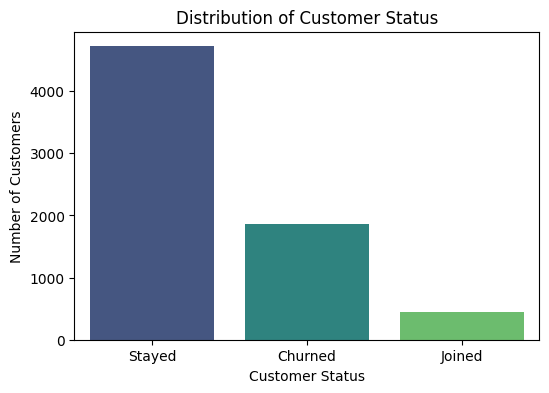


Value counts for Customer Status:
Customer Status
Stayed     4720
Churned    1869
Joined      454
Name: count, dtype: int64


In [13]:
# Visualize the distribution of the 'Customer Status'
plt.figure(figsize=(6, 4))
sns.countplot(x='Customer Status', data=df, palette='viridis', hue='Customer Status', legend=False) # Added hue and legend=False
plt.title('Distribution of Customer Status')
plt.xlabel('Customer Status')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

# Print the value counts to see the exact numbers
print("\nValue counts for Customer Status:")
print(df['Customer Status'].value_counts())

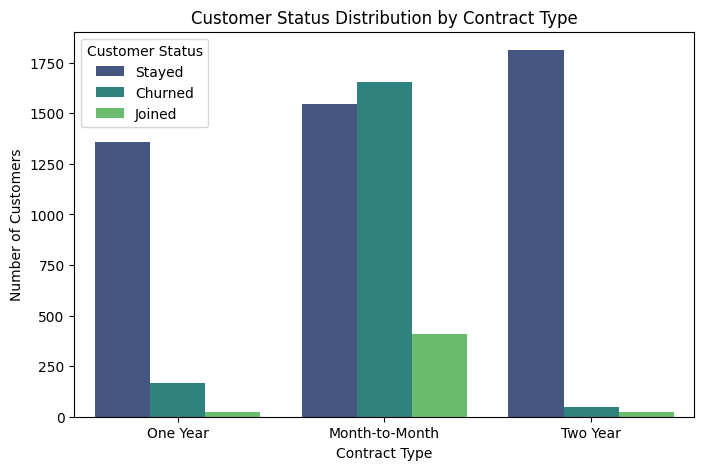

In [14]:
# Explore the relationship between 'Contract' and 'Customer Status'
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Customer Status', data=df, palette='viridis')
plt.title('Customer Status Distribution by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Customer Status')
plt.show()

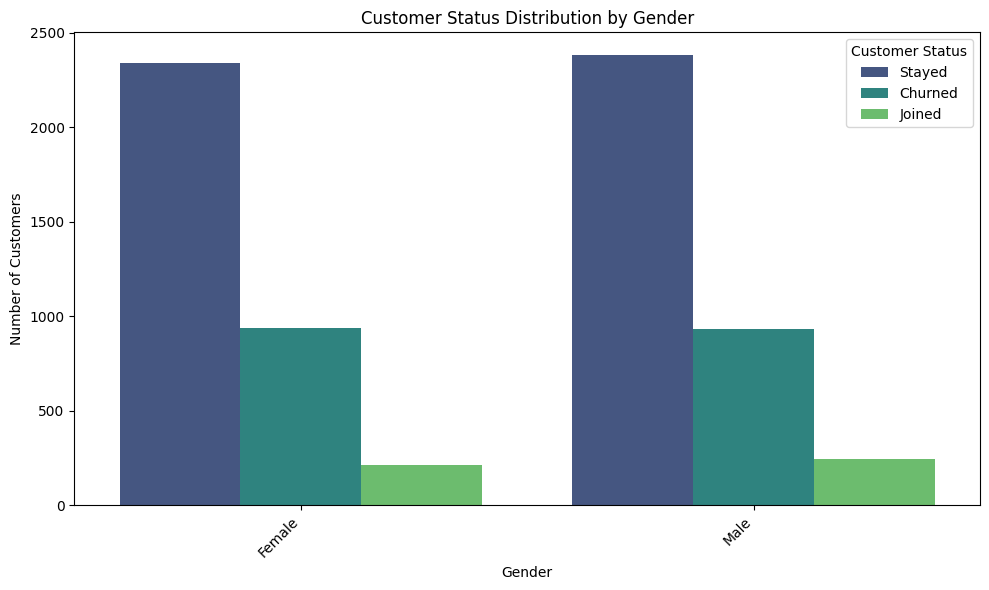

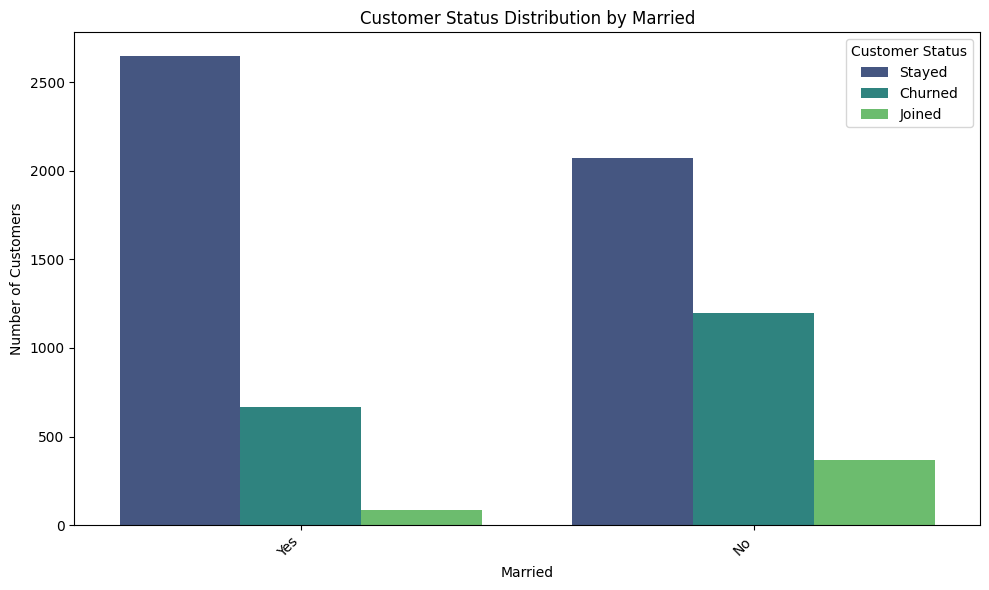

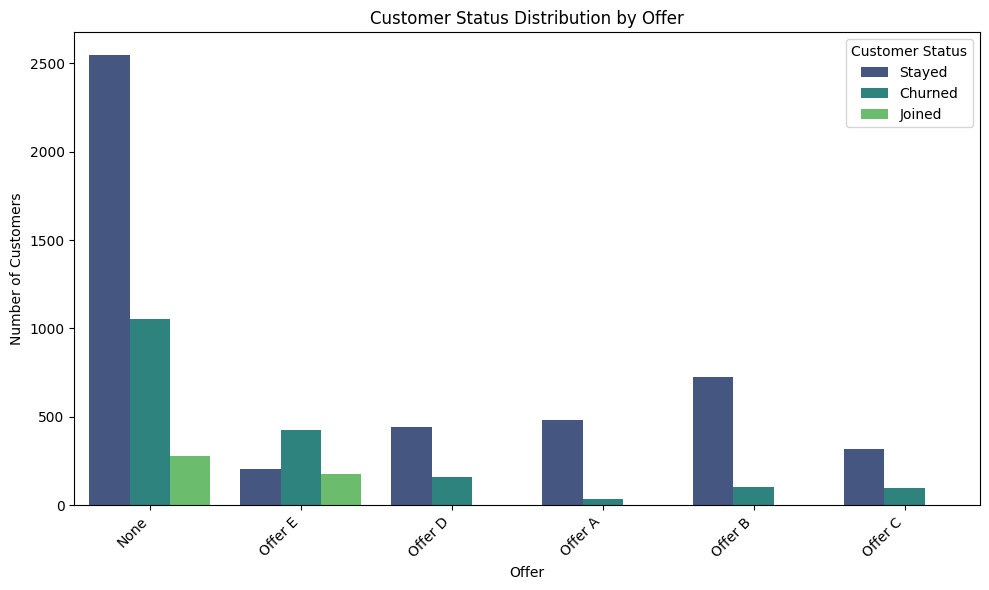

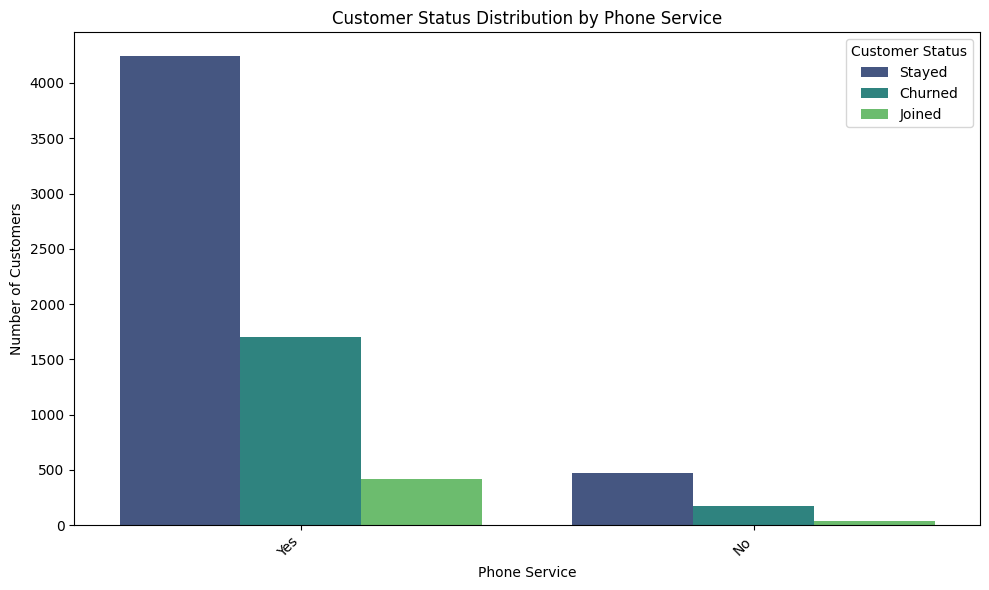

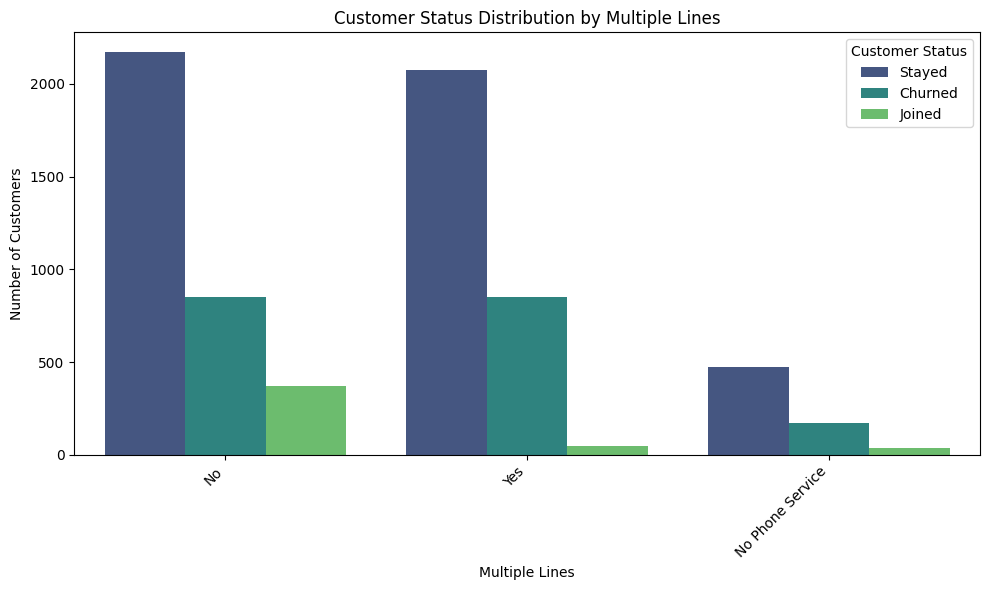

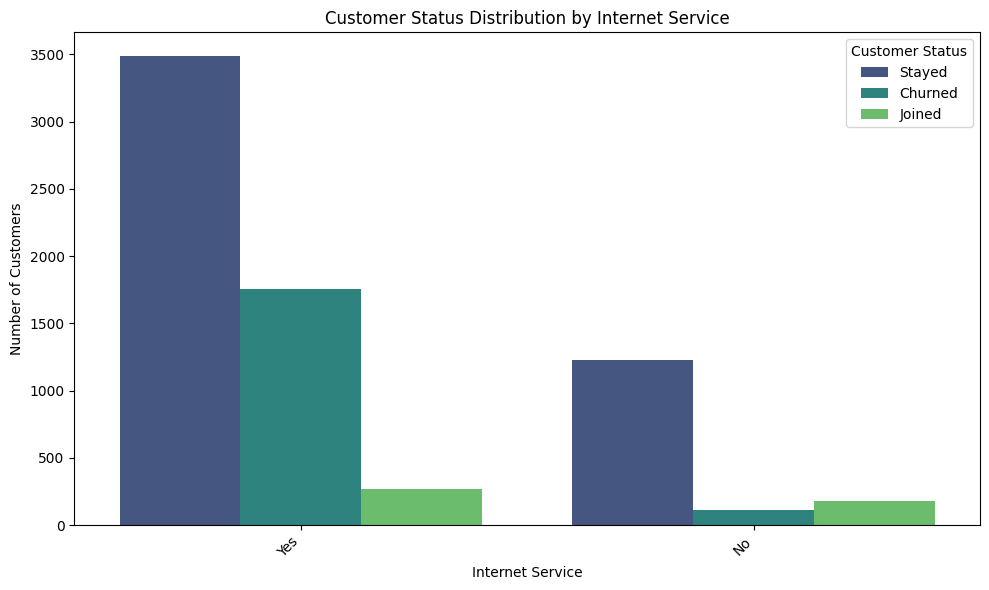

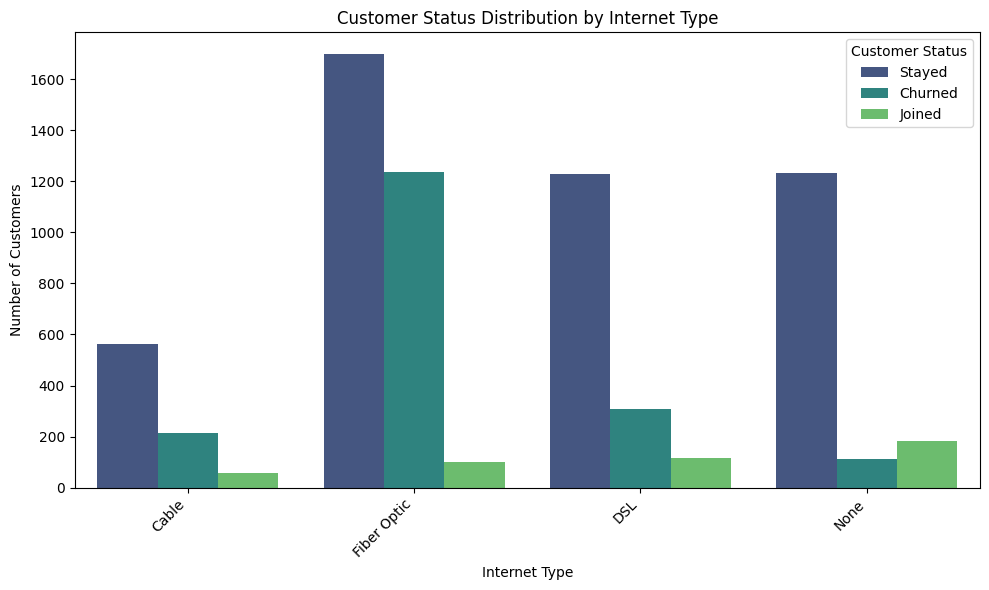

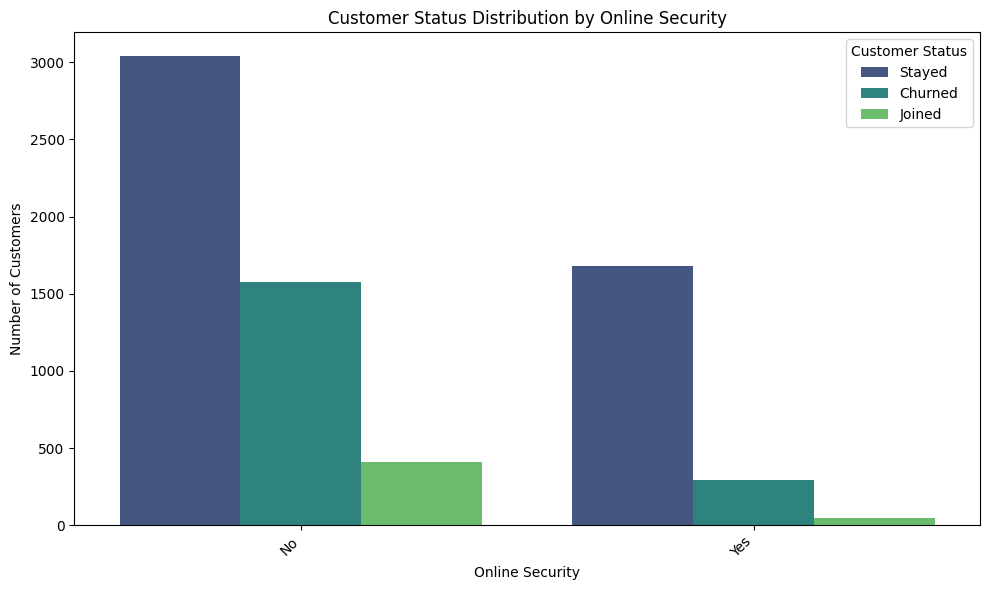

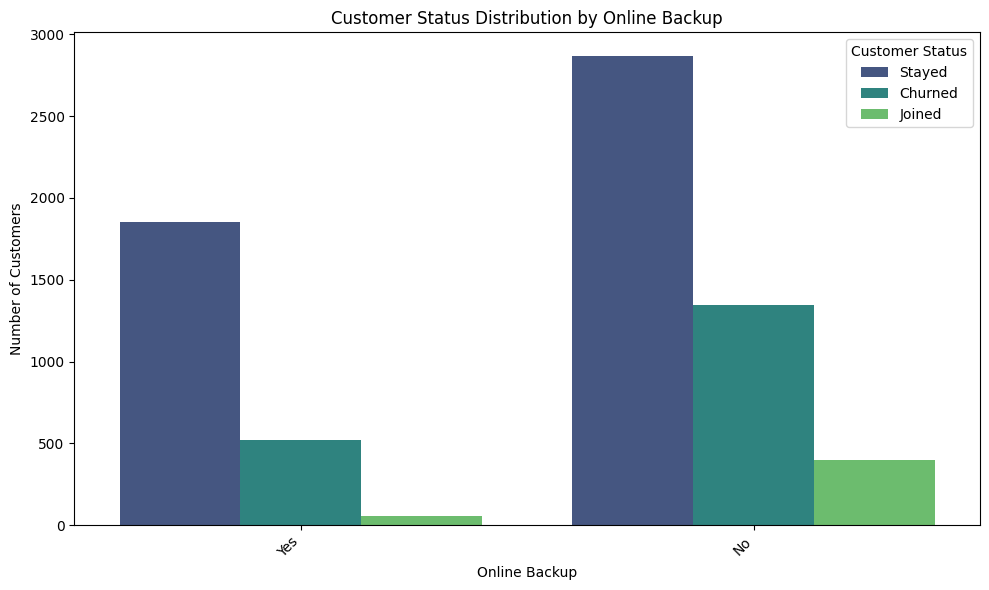

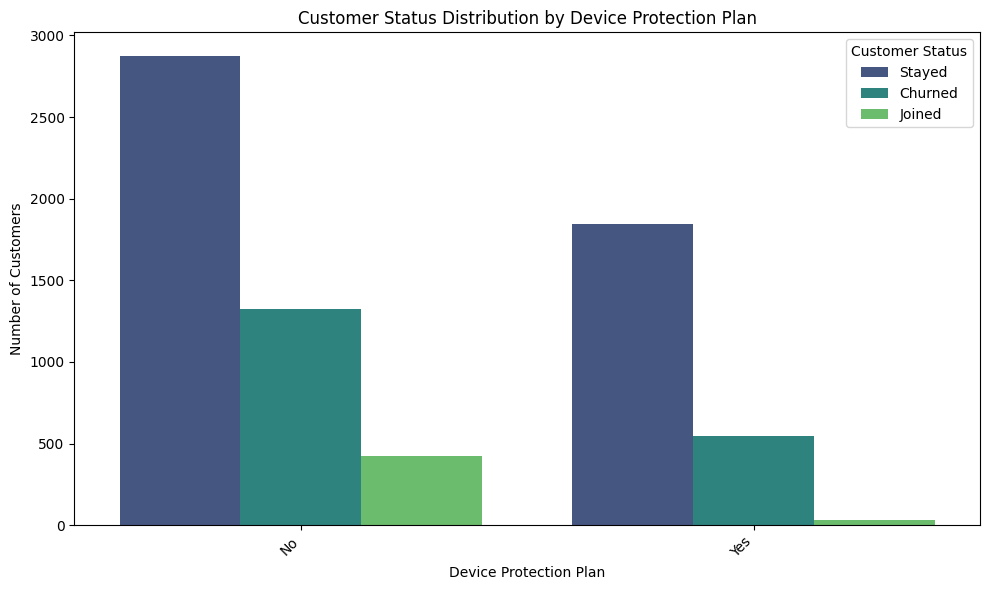

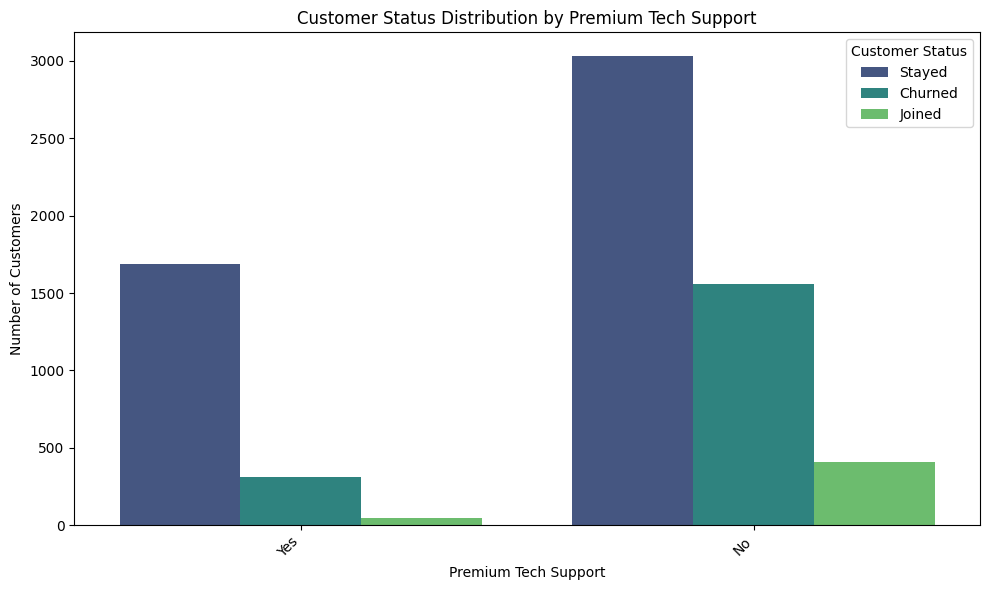

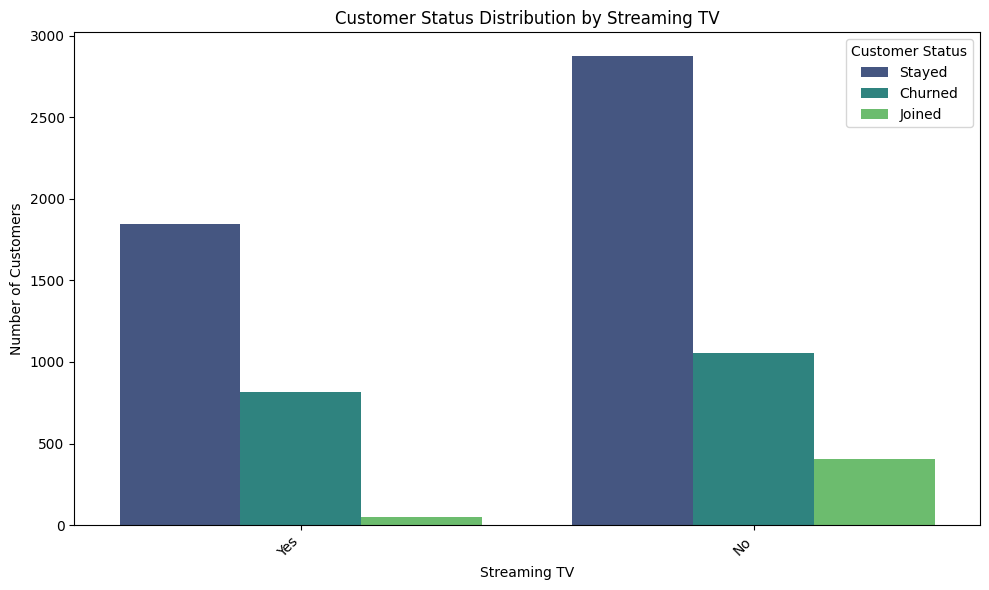

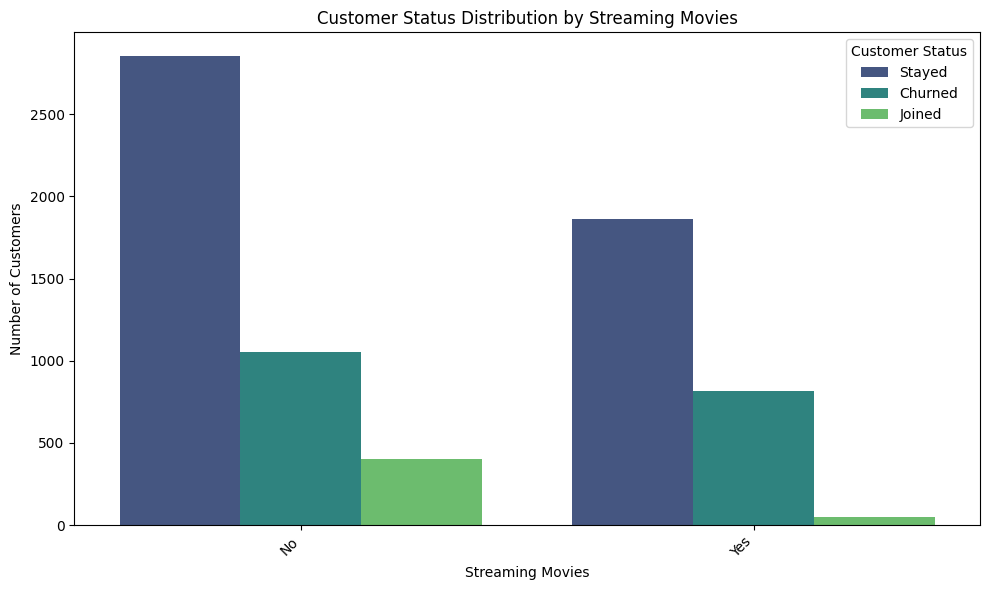

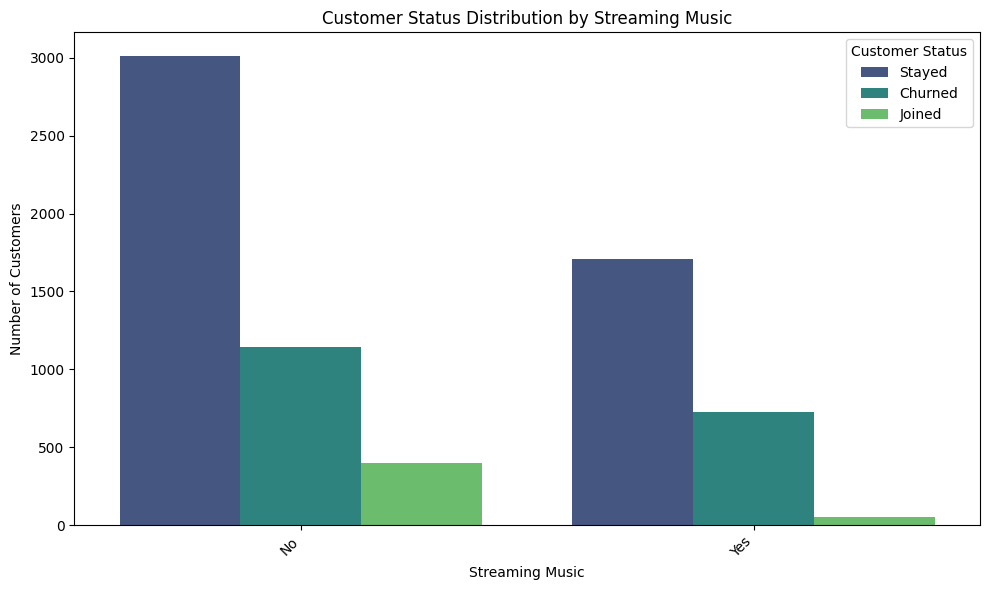

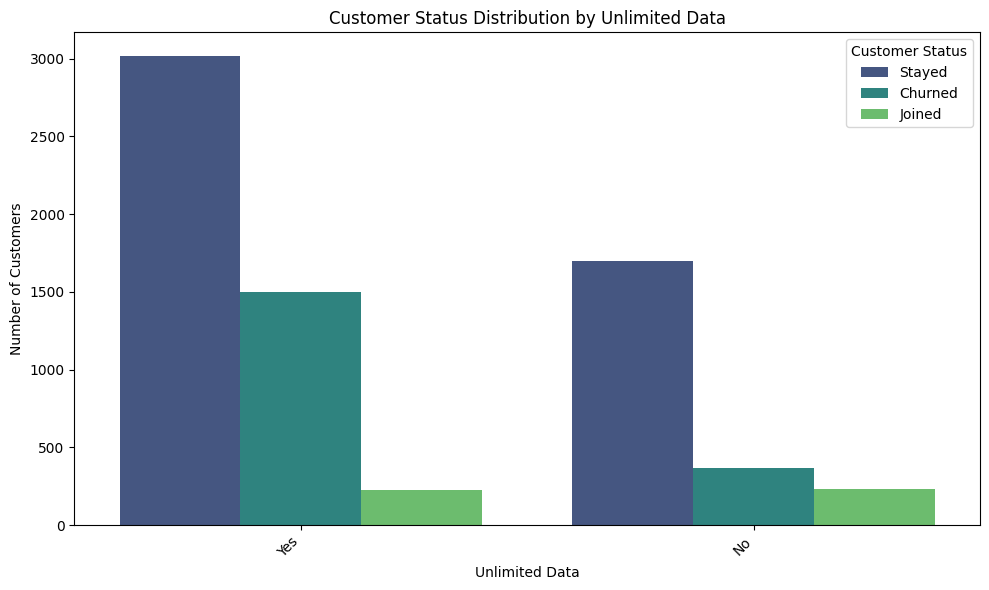

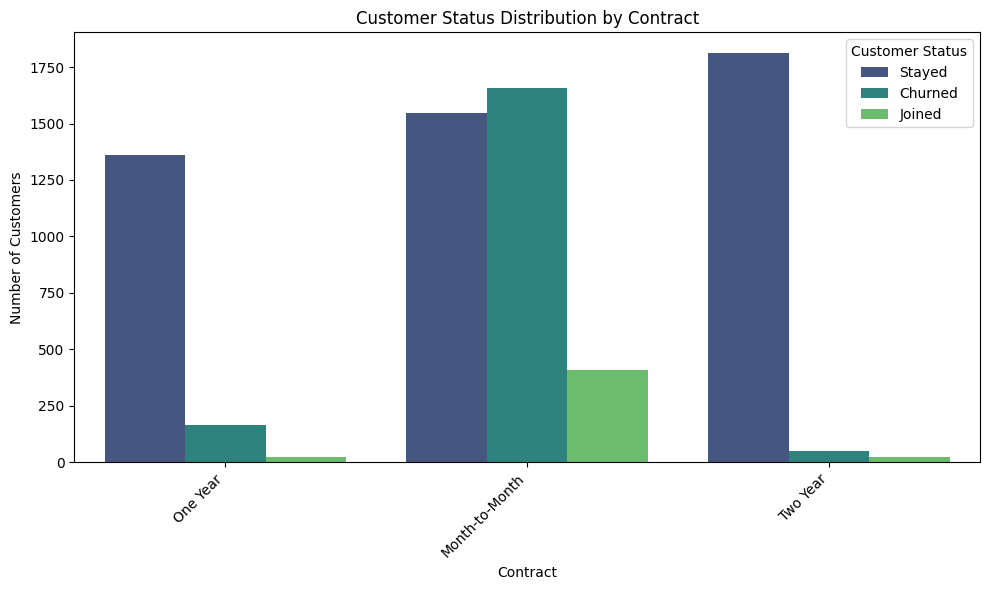

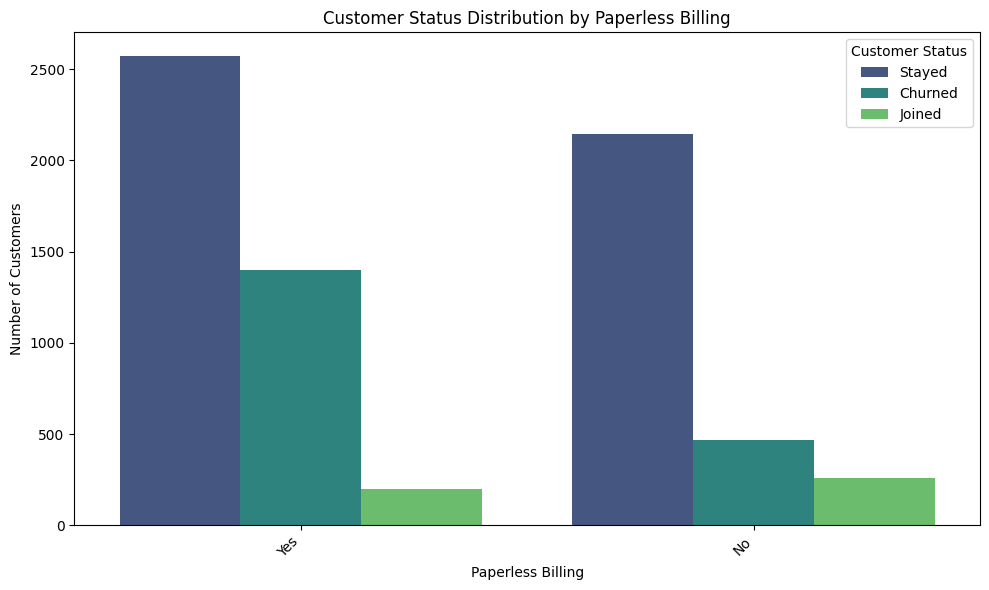

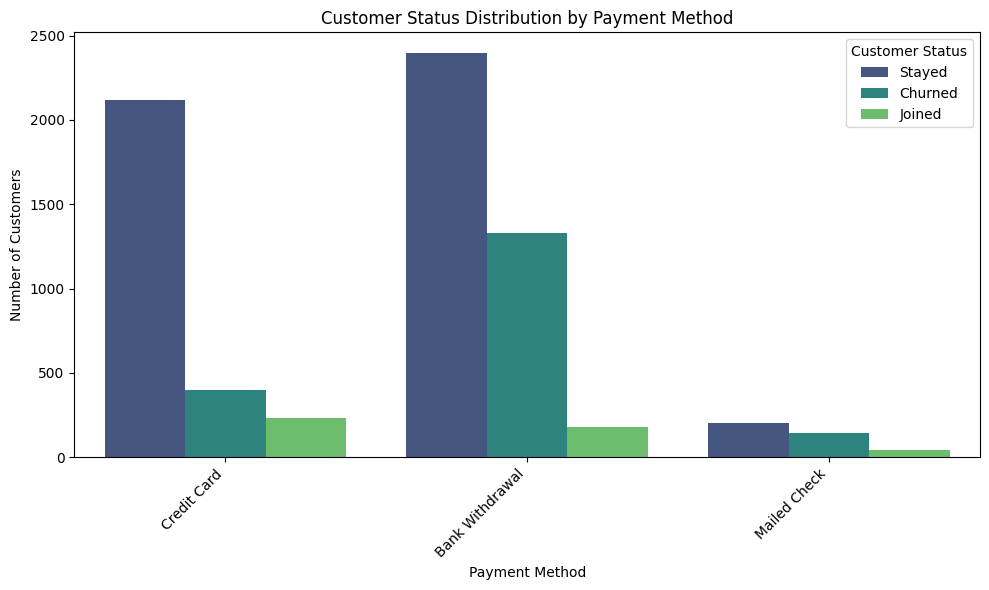

In [15]:
# Identify nominal features (object type) excluding target and churn reasons
nominal_cols = df.select_dtypes(include='object').columns.tolist()
nominal_cols.remove('Customer Status') # Remove the target variable
# Assuming 'Churn Category' and 'Churn Reason' are not needed for this specific visualization
nominal_cols = [col for col in nominal_cols if col not in ['Churn Category', 'Churn Reason']]


# Generate count plots for each nominal feature against Customer Status
for col in nominal_cols:
    plt.figure(figsize=(10, 6)) # Adjust figure size as needed
    sns.countplot(x=col, hue='Customer Status', data=df, palette='viridis')
    plt.title(f'Customer Status Distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
    plt.legend(title='Customer Status')
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()

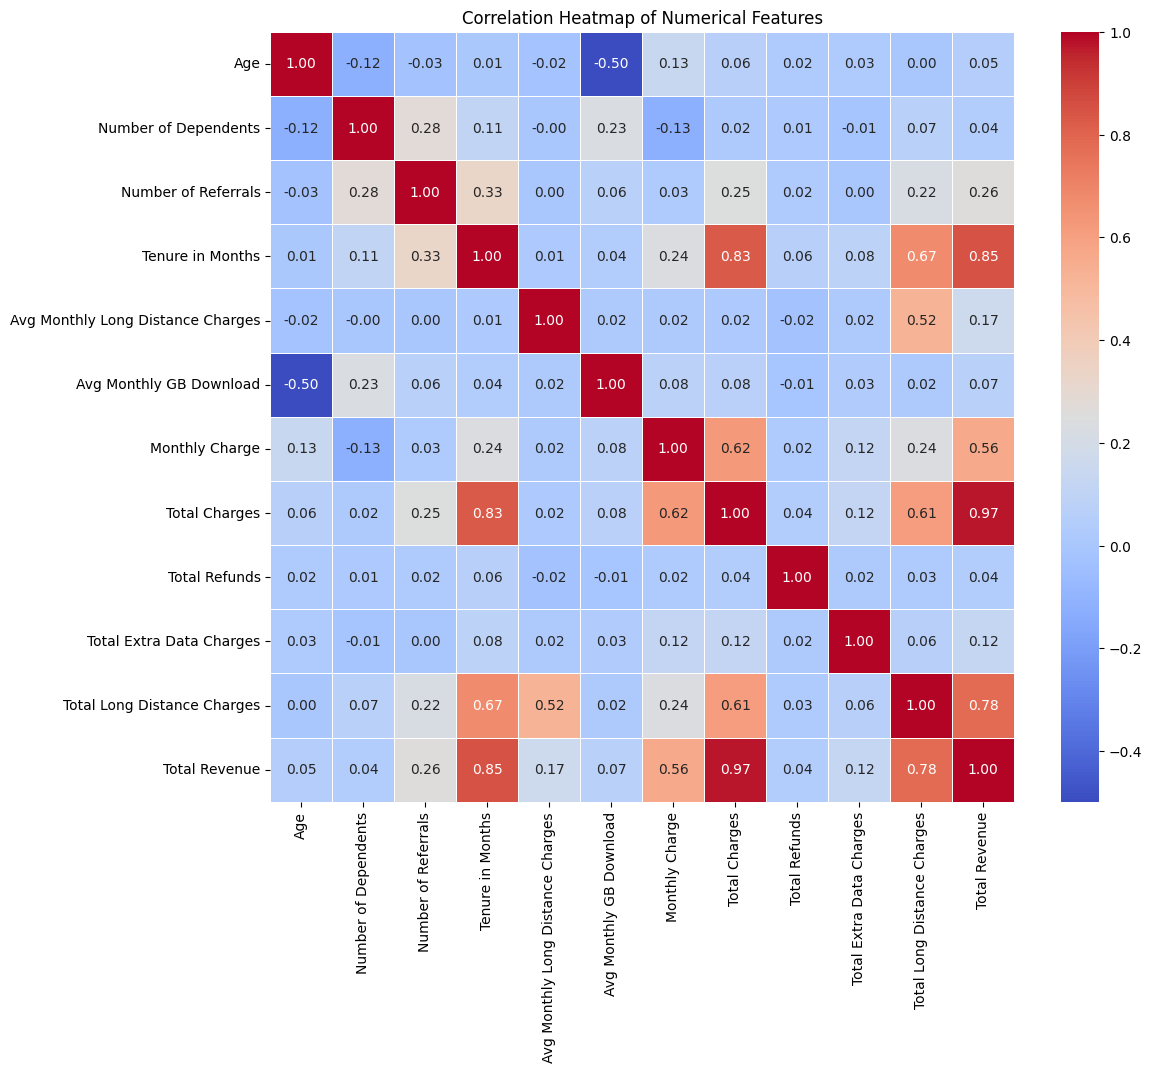

In [16]:
# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Based on the correlation heatmap and matrix values, here are a few key observations about the relationships between the numerical features:

1.  Strong Positive Correlation

Tenure in Months is strongly correlated with Total Charges (0.83) and Total Revenue (0.85).

Total Long Distance Charges is moderately correlated with Total Revenue (0.78).


2.  Moderate Positive Correlation

Monthly Charge is moderately correlated with Total Charges (0.62) and Total Revenue (0.56).

3.  Weak or No Significant Correlation

Age, Number of Dependents, and Number of Referrals show weak correlations with most other numerical features.

Monthly Charge has a relatively weak positive correlation with Tenure in Months (0.24).

Interpretation:
These observations suggest that tenure is a primary driver of total charges and revenue, indicating that longer-term customers contribute more to total billing. Additionally, the relationships among billing-related variables (e.g., Monthly Charges, Total Revenue, Total Long Distance Charges) highlight the influence of usage and pricing on customer value.

# Feature Engineering

In [17]:
# Example Feature Engineering: Creating Interaction Terms

# Interaction between Tenure and Monthly Charge
df['Tenure_Monthly_Charge'] = df['Tenure in Months'] * df['Monthly Charge']

# Interaction between Number of Referrals and Tenure
df['Referrals_Tenure'] = df['Number of Referrals'] * df['Tenure in Months']

# Create a feature for Total Services (sum of relevant binary service columns)
service_cols = ['Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security',
                'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
                'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data']

# Convert 'Yes'/'No' columns to numerical (1/0) for summation
df['Total Services'] = df[service_cols].apply(lambda row: sum([1 if x == 'Yes' else 0 for x in row]), axis=1)


# Display the new features and a few original columns to see the changes
display(df[['Tenure in Months', 'Monthly Charge', 'Tenure_Monthly_Charge',
            'Number of Referrals', 'Referrals_Tenure', 'Total Services', 'Phone Service', 'Multiple Lines']].head())

,Tenure in Months,Monthly Charge,Tenure_Monthly_Charge,Number of Referrals,Referrals_Tenure,Total Services,Phone Service,Multiple Lines
0,9,65.6,590.4,2,18,6,Yes,No
1,9,-4.0,-36.0,0,0,5,Yes,Yes
2,4,73.9,295.6,0,0,4,Yes,No
3,13,98.0,1274.0,1,13,7,Yes,No
4,3,83.9,251.7,3,9,5,Yes,No


### Encoding Categorical Features

In [18]:
# Identify nominal features (excluding the target variable and the churn reasons we filled with 'No Churn')
nominal_cols = df.select_dtypes(include='object').columns.tolist()
nominal_cols.remove('Customer Status')
# Remove 'Churn Category' and 'Churn Reason' as we filled missing and may not use them directly as features
nominal_cols = [col for col in nominal_cols if col not in ['Churn Category', 'Churn Reason']]

print(f"Categorical columns to encode: {nominal_cols}")

# Apply one-hot encoding to the nominal features
df_encoded = pd.get_dummies(df, columns=nominal_cols, drop_first=True) # Use drop_first to avoid multicollinearity

# Display the first few rows of the encoded DataFrame and its shape
display(df_encoded.head())
print("\nShape of the encoded DataFrame:", df_encoded.shape)

Categorical columns to encode: ['Gender', 'Married', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method']


,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,...,Premium Tech Support_Yes,Streaming TV_Yes,Streaming Movies_Yes,Streaming Music_Yes,Unlimited Data_Yes,Contract_One Year,Contract_Two Year,Paperless Billing_Yes,Payment Method_Credit Card,Payment Method_Mailed Check
0,37,0,2,9,42.39,16.0,65.6,593.30,0.00,0,...,True,True,False,False,True,True,False,True,True,False
1,46,0,0,9,10.69,10.0,-4.0,542.40,38.33,10,...,False,False,True,True,False,False,False,False,True,False
2,50,0,0,4,33.65,30.0,73.9,280.85,0.00,0,...,False,False,False,False,True,False,False,True,False,False
3,78,0,1,13,27.82,4.0,98.0,1237.85,0.00,0,...,False,True,True,False,True,False,False,True,False,False
4,75,0,3,3,7.38,11.0,83.9,267.40,0.00,0,...,True,True,False,False,True,False,False,True,True,False



Shape of the encoded DataFrame: (7043, 45)


# Finalizing Features and Target

In [19]:
# Define features (X) and target (y)
X = df_encoded.drop(['Customer Status', 'Churn Category', 'Churn Reason'], axis=1) # Drop the original target and churn columns
y = df_encoded['Customer Status']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Features (X) shape: (7043, 42)
Target (y) shape: (7043,)


In [20]:
display(X.head())

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,...,Premium Tech Support_Yes,Streaming TV_Yes,Streaming Movies_Yes,Streaming Music_Yes,Unlimited Data_Yes,Contract_One Year,Contract_Two Year,Paperless Billing_Yes,Payment Method_Credit Card,Payment Method_Mailed Check
0,37,0,2,9,42.39,16.0,65.6,593.30,0.00,0,...,True,True,False,False,True,True,False,True,True,False
1,46,0,0,9,10.69,10.0,-4.0,542.40,38.33,10,...,False,False,True,True,False,False,False,False,True,False
2,50,0,0,4,33.65,30.0,73.9,280.85,0.00,0,...,False,False,False,False,True,False,False,True,False,False
3,78,0,1,13,27.82,4.0,98.0,1237.85,0.00,0,...,False,True,True,False,True,False,False,True,False,False
4,75,0,3,3,7.38,11.0,83.9,267.40,0.00,0,...,True,True,False,False,True,False,False,True,True,False


# Feature Selection

In [21]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top K features (you can adjust K)
k = 20 # Let's start with selecting the top 20 features

# Initialize SelectKBest with f_classif as the scoring function
# We need to handle potential non-finite values in X before applying f_classif
# Let's fill any potential NaNs in X with the mean of the respective columns
X_filled = X.fillna(X.mean())


selector = SelectKBest(score_func=f_classif, k=k)

# Fit the selector to the data and transform the data
X_selected = selector.fit_transform(X_filled, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

print(f"Selected {k} features:")
print(selected_features)

# You can now use X_selected and selected_features for modeling

Selected 20 features:
Index(['Number of Dependents', 'Number of Referrals', 'Tenure in Months',
       'Monthly Charge', 'Total Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Tenure_Monthly_Charge', 'Referrals_Tenure',
       'Total Services', 'Married_Yes', 'Offer_Offer E',
       'Internet Service_Yes', 'Internet Type_Fiber Optic',
       'Internet Type_None', 'Online Security_Yes', 'Premium Tech Support_Yes',
       'Contract_One Year', 'Contract_Two Year', 'Payment Method_Credit Card'],
      dtype='object')


In [22]:
# Create a new DataFrame with only the selected features
X_final = pd.DataFrame(X_selected, columns=selected_features)

# Display the first few rows of the final features DataFrame
display(X_final.head())

print("\nShape of the final features DataFrame:", X_final.shape)

,Number of Dependents,Number of Referrals,Tenure in Months,Monthly Charge,Total Charges,Total Long Distance Charges,Total Revenue,Tenure_Monthly_Charge,Referrals_Tenure,Total Services,Married_Yes,Offer_Offer E,Internet Service_Yes,Internet Type_Fiber Optic,Internet Type_None,Online Security_Yes,Premium Tech Support_Yes,Contract_One Year,Contract_Two Year,Payment Method_Credit Card
0,0.0,2.0,9.0,65.6,593.30,381.51,974.81,590.4,18.0,6.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,0.0,0.0,9.0,-4.0,542.40,96.21,610.28,-36.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,4.0,73.9,280.85,134.60,415.45,295.6,0.0,4.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,13.0,98.0,1237.85,361.66,1599.51,1274.0,13.0,7.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,3.0,3.0,83.9,267.40,22.14,289.54,251.7,9.0,5.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0



Shape of the final features DataFrame: (7043, 20)


# Prepare Data For Modelling

In [23]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# We'll use a standard split, like 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5634, 20)
Shape of X_test: (1409, 20)
Shape of y_train: (5634,)
Shape of y_test: (1409,)


In [24]:
y_train

,Customer Status
502,Stayed
919,Stayed
1080,Stayed
2186,Churned
1030,Stayed
...,...
6545,Stayed
442,Stayed
3341,Stayed
246,Churned


# Encoding Target Variable

In [25]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the training and testing target variables
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test) # Use transform only on test set to avoid fitting on test data

# Display the first few encoded target values and the classes
print("Encoded y_train:", y_train_encoded[:10])
print("Encoded y_test:", y_test_encoded[:10])
print("Classes and their encoded values:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Encoded y_train: [2 2 2 0 2 2 0 1 2 2]
Encoded y_test: [2 0 2 0 2 1 2 0 0 2]
Classes and their encoded values: {'Churned': np.int64(0), 'Joined': np.int64(1), 'Stayed': np.int64(2)}


In [26]:
y_test_encoded

array([2, 0, 2, ..., 0, 0, 2])

In [27]:
print("Value counts for Customer Status (original data):")
print(y.value_counts())

Value counts for Customer Status (original data):
Customer Status
Stayed     4720
Churned    1869
Joined      454
Name: count, dtype: int64


# Handling Imbalanced Data with SMOTE

In [28]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Initialize SMOTE
# We can set the sampling_strategy to 'auto' to balance all classes,
# or specify a dictionary to control the ratio of each class.
# Let's start by balancing all classes to have the same number of samples
# as the majority class (which is 'Stayed' with encoded value 2).
# However, SMOTE is typically used for binary classification.
# For multi-class imbalance, we can use SMOTE with a strategy that
# balances each minority class to the number of samples in the majority class.
# Let's confirm the encoded values for each class first.
# From previous output: {'Churned': 0, 'Joined': 1, 'Stayed': 2}
# Majority class is 2 (Stayed).

# Let's use a dictionary to specify the desired number of samples for each class
# We'll aim to have the same number of samples for all classes as the majority class ('Stayed').
# Find the count of the majority class in the training data
majority_class_count = np.bincount(y_train_encoded)[2] # Encoded value for 'Stayed' is 2

# Define the sampling strategy as a dictionary
sampling_strategy = {0: majority_class_count,  # 'Churned'
                     1: majority_class_count,  # 'Joined'
                     2: majority_class_count}  # 'Stayed' (already majority)

smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_encoded)

print("Shape of X_train_resampled:", X_train_resampled.shape)
print("Shape of y_train_resampled:", y_train_resampled.shape)

# Print the value counts of the resampled target variable
print("\nValue counts for resampled y_train_encoded:")
print(np.bincount(y_train_resampled))

# You can also print the value counts with class labels for clarity
print("\nValue counts for resampled y_train_encoded with labels:")
# Assuming label_encoder is still available from the previous cell
print(dict(zip(label_encoder.classes_, np.bincount(y_train_resampled))))

Shape of X_train_resampled: (11328, 20)
Shape of y_train_resampled: (11328,)

Value counts for resampled y_train_encoded:
[3776 3776 3776]

Value counts for resampled y_train_encoded with labels:
{'Churned': np.int64(3776), 'Joined': np.int64(3776), 'Stayed': np.int64(3776)}


# Model Training

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Scale -> LogisticRegression
logreg = Pipeline([
    ("scaler", StandardScaler(with_mean=False) if hasattr(X_train_resampled, "tocsr") else StandardScaler()),
    ("clf", LogisticRegression(
        solver="lbfgs",          # keep lbfgs
        max_iter=5000,           # plenty of iterations
        tol=1e-3,                # slightly looser tolerance for quicker convergence
        C=1.0,                   # default regularization; lower (e.g., 0.5) if still warning
        random_state=42
    ))
])

logreg.fit(X_train_resampled, y_train_resampled)
print("Model training complete.")

# Optional: check how many iterations were actually used
n_iter = logreg.named_steps["clf"].n_iter_
print("Iterations used per class:", n_iter)


Model training complete.
Iterations used per class: [35]


# Model Evaluation

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred_encoded = logreg.predict(X_test)

# Decode the predictions back to original labels for better readability
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7608

Classification Report:
              precision    recall  f1-score   support

     Churned       0.57      0.69      0.62       374
      Joined       0.43      0.85      0.57        91
      Stayed       0.95      0.78      0.86       944

    accuracy                           0.76      1409
   macro avg       0.65      0.77      0.68      1409
weighted avg       0.81      0.76      0.78      1409


Confusion Matrix:
[[259  76  39]
 [ 14  77   0]
 [183  25 736]]


# Train another model: Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
# We'll use default parameters for now, but we can tune them later if needed
rf_model = RandomForestClassifier(random_state=42)

# Train the model using the resampled training data
rf_model.fit(X_train_resampled, y_train_resampled)

print("Random Forest model training complete.")

Random Forest model training complete.


# Random Forest Model Evaluation

In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set using the Random Forest model
y_pred_rf_encoded = rf_model.predict(X_test)

# Decode the predictions back to original labels
y_pred_rf = label_encoder.inverse_transform(y_pred_rf_encoded)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# Print the classification report for the Random Forest model
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Print the confusion matrix for the Random Forest model
print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.8318

Random Forest Classification Report:
              precision    recall  f1-score   support

     Churned       0.70      0.65      0.67       374
      Joined       0.66      0.68      0.67        91
      Stayed       0.90      0.92      0.91       944

    accuracy                           0.83      1409
   macro avg       0.75      0.75      0.75      1409
weighted avg       0.83      0.83      0.83      1409


Random Forest Confusion Matrix:
[[244  32  98]
 [ 28  62   1]
 [ 78   0 866]]


# Train another model: LightGBM

In [33]:
import lightgbm as lgb

# Optional cleanup: fix feature names
X_train_resampled.columns = X_train_resampled.columns.str.replace(" ", "_")

# Initialize LightGBM with suppressed logs and clean threading
lgbm_model = lgb.LGBMClassifier(
    random_state=42,
    verbose=-1,            # suppress training logs
    force_row_wise=True    # optional optimization
)

lgbm_model.fit(X_train_resampled, y_train_resampled)
print("LightGBM model training complete.")


LightGBM model training complete.


# LightGBM Model Evaluation

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set using the LightGBM model
y_pred_lgbm_encoded = lgbm_model.predict(X_test)

# Decode the predictions back to original labels
y_pred_lgbm = label_encoder.inverse_transform(y_pred_lgbm_encoded)

# Evaluate the LightGBM model
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"LightGBM Accuracy: {accuracy_lgbm:.4f}")

# Print the classification report for the LightGBM model
print("\nLightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgbm))

# Print the confusion matrix for the LightGBM model
print("\nLightGBM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgbm))

LightGBM Accuracy: 0.8361

LightGBM Classification Report:
              precision    recall  f1-score   support

     Churned       0.70      0.68      0.69       374
      Joined       0.65      0.70      0.67        91
      Stayed       0.91      0.91      0.91       944

    accuracy                           0.84      1409
   macro avg       0.75      0.76      0.76      1409
weighted avg       0.84      0.84      0.84      1409


LightGBM Confusion Matrix:
[[254  35  85]
 [ 27  64   0]
 [ 84   0 860]]


# Train another model: XGBoost

In [35]:
import xgboost as xgb

# Initialize the XGBoost model
# We'll use default parameters for now
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_), random_state=42)

# Train the model using the resampled training data
xgb_model.fit(X_train_resampled, y_train_resampled)

print("XGBoost model training complete.")

XGBoost model training complete.


# XGBoost Model Evaluation

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ensure feature names in X_test match those used during training
# We need to align the column names of X_test with X_train_resampled
X_test.columns = X_test.columns.str.replace(" ", "_")


# Make predictions on the test set using the XGBoost model
y_pred_xgb_encoded = xgb_model.predict(X_test)

# Decode the predictions back to original labels
y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb_encoded)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

# Print the classification report for the XGBoost model
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Print the confusion matrix for the XGBoost model
print("\nXGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

XGBoost Accuracy: 0.8332

XGBoost Classification Report:
              precision    recall  f1-score   support

     Churned       0.70      0.66      0.68       374
      Joined       0.64      0.68      0.66        91
      Stayed       0.90      0.92      0.91       944

    accuracy                           0.83      1409
   macro avg       0.75      0.75      0.75      1409
weighted avg       0.83      0.83      0.83      1409


XGBoost Confusion Matrix:
[[247  35  92]
 [ 29  62   0]
 [ 79   0 865]]


### Train another model: Support Vector Machine (SVM)

In [37]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Initialize the SVM model within a pipeline, including a StandardScaler for numerical features
# SVC is sensitive to feature scaling, so it's crucial to scale the data.
svm_model = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(random_state=42, probability=True)) # probability=True is needed for some evaluation metrics like ROC AUC, if used later
])

# Train the model using the resampled training data
# Note: X_train_resampled already has cleaned column names from previous steps if LightGBM/XGBoost were run before.
# StandardScaler in the pipeline will handle the scaling.
svm_model.fit(X_train_resampled, y_train_resampled)

print("Support Vector Machine model training complete.")

Support Vector Machine model training complete.


### Support Vector Machine Model Evaluation

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set using the SVM model
# X_test also needs column name cleaning for consistency, if not already done.
# The scaler in the pipeline will automatically transform X_test.
X_test_clean_svm = X_test.copy()
X_test_clean_svm.columns = X_test_clean_svm.columns.str.replace(' ', '_')
y_pred_svm_encoded = svm_model.predict(X_test_clean_svm)

# Decode the predictions back to original labels
y_pred_svm = label_encoder.inverse_transform(y_pred_svm_encoded)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Support Vector Machine Accuracy: {accuracy_svm:.4f}")

# Print the classification report for the SVM model
print("\nSupport Vector Machine Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Print the confusion matrix for the SVM model
print("\nSupport Vector Machine Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

Support Vector Machine Accuracy: 0.7871

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

     Churned       0.63      0.69      0.66       374
      Joined       0.45      0.79      0.57        91
      Stayed       0.93      0.83      0.88       944

    accuracy                           0.79      1409
   macro avg       0.67      0.77      0.70      1409
weighted avg       0.82      0.79      0.80      1409


Support Vector Machine Confusion Matrix:
[[257  61  56]
 [ 17  72   2]
 [136  28 780]]


### Train another model: K-Nearest Neighbors (KNN)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Initialize the KNN model within a pipeline, including a StandardScaler for numerical features
# KNN is sensitive to feature scaling, so it's crucial to scale the data.
knn_model = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Train the model using the resampled training data
# StandardScaler in the pipeline will handle the scaling.
knn_model.fit(X_train_resampled, y_train_resampled)

print("K-Nearest Neighbors model training complete.")

K-Nearest Neighbors model training complete.


### K-Nearest Neighbors Model Evaluation

In [40]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set using the KNN model
# X_test also needs column name cleaning for consistency, if not already done.
# The scaler in the pipeline will automatically transform X_test.
X_test_clean_knn = X_test.copy()
X_test_clean_knn.columns = X_test_clean_knn.columns.str.replace(' ', '_')
y_pred_knn_encoded = knn_model.predict(X_test_clean_knn)

# Decode the predictions back to original labels
y_pred_knn = label_encoder.inverse_transform(y_pred_knn_encoded)

# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Accuracy: {accuracy_knn:.4f}")

# Print the classification report for the KNN model
print("\nK-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Print the confusion matrix for the KNN model
print("\nK-Nearest Neighbors Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

K-Nearest Neighbors Accuracy: 0.7559

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

     Churned       0.59      0.68      0.63       374
      Joined       0.43      0.64      0.51        91
      Stayed       0.90      0.80      0.84       944

    accuracy                           0.76      1409
   macro avg       0.64      0.71      0.66      1409
weighted avg       0.78      0.76      0.77      1409


K-Nearest Neighbors Confusion Matrix:
[[255  42  77]
 [ 23  58  10]
 [157  35 752]]


### Train another model: Gradient Boosting Classifier

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier model
# Using default parameters for now; tuning can be done later if needed.
gbc_model = GradientBoostingClassifier(random_state=42)

# Train the model using the resampled training data
gbc_model.fit(X_train_resampled, y_train_resampled)

print("Gradient Boosting Classifier model training complete.")

Gradient Boosting Classifier model training complete.


### Gradient Boosting Classifier Model Evaluation

In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set using the Gradient Boosting Classifier model
# Ensure X_test has clean column names for consistency.
X_test_clean_gbc = X_test.copy()
X_test_clean_gbc.columns = X_test_clean_gbc.columns.str.replace(' ', '_')
y_pred_gbc_encoded = gbc_model.predict(X_test_clean_gbc)

# Decode the predictions back to original labels
y_pred_gbc = label_encoder.inverse_transform(y_pred_gbc_encoded)

# Evaluate the Gradient Boosting Classifier model
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
print(f"Gradient Boosting Classifier Accuracy: {accuracy_gbc:.4f}")

# Print the classification report for the Gradient Boosting Classifier model
print("\nGradient Boosting Classifier Classification Report:")
print(classification_report(y_test, y_pred_gbc))

# Print the confusion matrix for the Gradient Boosting Classifier model
print("\nGradient Boosting Classifier Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gbc))

Gradient Boosting Classifier Accuracy: 0.8389

Gradient Boosting Classifier Classification Report:
              precision    recall  f1-score   support

     Churned       0.71      0.67      0.69       374
      Joined       0.63      0.84      0.72        91
      Stayed       0.92      0.91      0.91       944

    accuracy                           0.84      1409
   macro avg       0.75      0.80      0.77      1409
weighted avg       0.84      0.84      0.84      1409


Gradient Boosting Classifier Confusion Matrix:
[[251  45  78]
 [ 15  76   0]
 [ 89   0 855]]


### Train another model: Decision Tree Classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier model
# Using default parameters for now; tuning can be done later if needed.
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model using the resampled training data
dt_model.fit(X_train_resampled, y_train_resampled)

print("Decision Tree Classifier model training complete.")

Decision Tree Classifier model training complete.


### Decision Tree Classifier Model Evaluation

In [44]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier model
# Using default parameters for now; tuning can be done later if needed.
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model using the resampled training data
dt_model.fit(X_train_resampled, y_train_resampled)

print("Decision Tree Classifier model training complete.")

Decision Tree Classifier model training complete.


### Decision Tree Classifier Model Evaluation

In [45]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set using the Decision Tree Classifier model
# Ensure X_test has clean column names for consistency.
X_test_clean_dt = X_test.copy()
X_test_clean_dt.columns = X_test_clean_dt.columns.str.replace(' ', '_')
y_pred_dt_encoded = dt_model.predict(X_test_clean_dt)

# Decode the predictions back to original labels
y_pred_dt = label_encoder.inverse_transform(y_pred_dt_encoded)

# Evaluate the Decision Tree Classifier model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Classifier Accuracy: {accuracy_dt:.4f}")

# Print the classification report for the Decision Tree Classifier model
print("\nDecision Tree Classifier Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Print the confusion matrix for the Decision Tree Classifier model
print("\nDecision Tree Classifier Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Decision Tree Classifier Accuracy: 0.7686

Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

     Churned       0.56      0.60      0.58       374
      Joined       0.60      0.62      0.61        91
      Stayed       0.88      0.85      0.86       944

    accuracy                           0.77      1409
   macro avg       0.68      0.69      0.68      1409
weighted avg       0.78      0.77      0.77      1409


Decision Tree Classifier Confusion Matrix:
[[224  38 112]
 [ 35  56   0]
 [141   0 803]]


# Model Accuracy Comparison

Model Accuracy Comparison:
Gradient Boosting Classifier    0.838893
LightGBM                        0.836054
XGBoost                         0.833215
Random Forest                   0.831796
Support Vector Machine          0.787083
Decision Tree Classifier        0.768630
Logistic Regression             0.760823
K-Nearest Neighbors             0.755855
dtype: float64


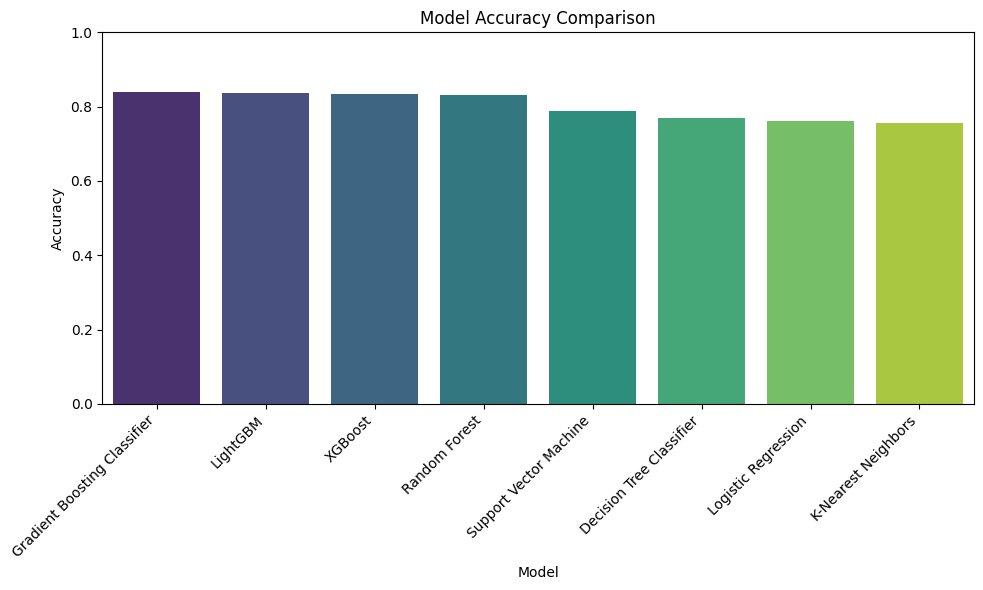

In [46]:
import pandas as pd

# Create a dictionary to store the accuracy scores
accuracy_scores = {
    'Logistic Regression': accuracy,
    'Random Forest': accuracy_rf,
    'LightGBM': accuracy_lgbm,
    'XGBoost': accuracy_xgb,
    'Support Vector Machine': accuracy_svm,
    'K-Nearest Neighbors': accuracy_knn,
    'Gradient Boosting Classifier': accuracy_gbc,
    'Decision Tree Classifier': accuracy_dt
}

# Create a pandas Series from the dictionary
accuracy_series = pd.Series(accuracy_scores)

# Sort the models by accuracy in descending order
accuracy_series = accuracy_series.sort_values(ascending=False)

# Print the accuracy comparison
print("Model Accuracy Comparison:")
print(accuracy_series)

# Optional: Create a bar plot for visual comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=accuracy_series.index, y=accuracy_series.values, palette='viridis', hue=accuracy_series.index, legend=False)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for accuracy
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 50_50 Split

In [47]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with a 50/50 ratio
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(X_final, y, test_size=0.5, random_state=42, stratify=y)

print("Shape of X_train_50:", X_train_50.shape)
print("Shape of X_test_50:", X_test_50.shape)
print("Shape of y_train_50:", y_train_50.shape)
print("Shape of y_test_50:", y_test_50.shape)

Shape of X_train_50: (3521, 20)
Shape of X_test_50: (3522, 20)
Shape of y_train_50: (3521,)
Shape of y_test_50: (3522,)


In [48]:
y_train_50

,Customer Status
7008,Stayed
672,Stayed
4678,Stayed
2571,Stayed
3472,Churned
...,...
2816,Stayed
3238,Stayed
2049,Churned
792,Joined


In [49]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the training and testing target variables
y_train_encoded_50 = label_encoder.fit_transform(y_train_50)
y_test_encoded_50 = label_encoder.transform(y_test_50) # Use transform only on test set to avoid fitting on test data

# Display the first few encoded target values and the classes
print("Encoded y_train:", y_train_encoded_50[:10])
print("Encoded y_test:", y_test_encoded_50[:10])
print("Classes and their encoded values:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Encoded y_train: [2 2 2 2 0 0 2 0 2 0]
Encoded y_test: [2 2 0 1 0 2 0 2 0 0]
Classes and their encoded values: {'Churned': np.int64(0), 'Joined': np.int64(1), 'Stayed': np.int64(2)}


In [50]:
y_test_encoded_50

array([2, 2, 0, ..., 1, 2, 2])

### Handling Imbalanced Data with SMOTE (50/50 Split)

In [51]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Find the count of the majority class in the training data
majority_class_count_50 = np.bincount(y_train_encoded_50)[2] # Encoded value for 'Stayed' is 2

# Define the sampling strategy as a dictionary
sampling_strategy_50 = {0: majority_class_count_50,  # 'Churned'
                       1: majority_class_count_50,  # 'Joined'
                       2: majority_class_count_50}  # 'Stayed' (already majority)

smote_50 = SMOTE(sampling_strategy=sampling_strategy_50, random_state=42)

# Apply SMOTE to the training data from the 50/50 split
X_train_resampled_50, y_train_resampled_50 = smote_50.fit_resample(X_train_50, y_train_encoded_50)

print("Shape of X_train_resampled_50:", X_train_resampled_50.shape)
print("Shape of y_train_resampled_50:", y_train_resampled_50.shape)

# Print the value counts of the resampled target variable
print("\nValue counts for resampled y_train_encoded_50:")
print(np.bincount(y_train_resampled_50))

# You can also print the value counts with class labels for clarity
print("\nValue counts for resampled y_train_encoded_50 with labels:")
# Assuming label_encoder is still available from the previous cell
print(dict(zip(label_encoder.classes_, np.bincount(y_train_resampled_50))))

Shape of X_train_resampled_50: (7080, 20)
Shape of y_train_resampled_50: (7080,)

Value counts for resampled y_train_encoded_50:
[2360 2360 2360]

Value counts for resampled y_train_encoded_50 with labels:
{'Churned': np.int64(2360), 'Joined': np.int64(2360), 'Stayed': np.int64(2360)}


### Model Training (50/50 Split) - Logistic Regression

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Scale -> LogisticRegression
logreg_50 = Pipeline([
    ("scaler", StandardScaler(with_mean=False) if hasattr(X_train_resampled_50, "tocsr") else StandardScaler()),
    ("clf", LogisticRegression(
        solver="lbfgs",
        max_iter=5000,
        tol=1e-3,
        C=1.0,
        random_state=42
    ))
])

logreg_50.fit(X_train_resampled_50, y_train_resampled_50)
print("Logistic Regression model training for 50/50 split complete.")

# Optional: check how many iterations were actually used
n_iter_50 = logreg_50.named_steps["clf"].n_iter_
print("Iterations used per class (50/50 split):", n_iter_50)

Logistic Regression model training for 50/50 split complete.
Iterations used per class (50/50 split): [39]


### Model Evaluation (50/50 Split) - Logistic Regression

In [53]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set from the 50/50 split
y_pred_encoded_50 = logreg_50.predict(X_test_50)

# Decode the predictions back to original labels for better readability
y_pred_50 = label_encoder.inverse_transform(y_pred_encoded_50)

# Evaluate the model
accuracy_50 = accuracy_score(y_test_50, y_pred_50)
print(f"Logistic Regression (50/50 Split) Accuracy: {accuracy_50:.4f}")

# Print the classification report
print("\nLogistic Regression (50/50 Split) Classification Report:")
print(classification_report(y_test_50, y_pred_50))

# Print the confusion matrix
print("\nLogistic Regression (50/50 Split) Confusion Matrix:")
print(confusion_matrix(y_test_50, y_pred_50))

Logistic Regression (50/50 Split) Accuracy: 0.7652

Logistic Regression (50/50 Split) Classification Report:
              precision    recall  f1-score   support

     Churned       0.58      0.69      0.63       935
      Joined       0.44      0.84      0.58       227
      Stayed       0.94      0.79      0.86      2360

    accuracy                           0.77      3522
   macro avg       0.65      0.77      0.69      3522
weighted avg       0.81      0.77      0.78      3522


Logistic Regression (50/50 Split) Confusion Matrix:
[[ 643  167  125]
 [  37  190    0]
 [ 428   70 1862]]


### Model Training (50/50 Split) - Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model_50 = RandomForestClassifier(random_state=42)

# Train the model using the resampled training data from the 50/50 split
rf_model_50.fit(X_train_resampled_50, y_train_resampled_50)

print("Random Forest model training for 50/50 split complete.")

Random Forest model training for 50/50 split complete.


### Model Evaluation (50/50 Split) - Random Forest

In [55]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set using the Random Forest model from the 50/50 split
y_pred_rf_encoded_50 = rf_model_50.predict(X_test_50)

# Decode the predictions back to original labels
y_pred_rf_50 = label_encoder.inverse_transform(y_pred_rf_encoded_50)

# Evaluate the Random Forest model
accuracy_rf_50 = accuracy_score(y_test_50, y_pred_rf_50)
print(f"Random Forest (50/50 Split) Accuracy: {accuracy_rf_50:.4f}")

# Print the classification report for the Random Forest model
print("\nRandom Forest (50/50 Split) Classification Report:")
print(classification_report(y_test_50, y_pred_rf_50))

# Print the confusion matrix for the Random Forest model
print("\nRandom Forest (50/50 Split) Confusion Matrix:")
print(confusion_matrix(y_test_50, y_pred_rf_50))

Random Forest (50/50 Split) Accuracy: 0.8231

Random Forest (50/50 Split) Classification Report:
              precision    recall  f1-score   support

     Churned       0.69      0.62      0.65       935
      Joined       0.66      0.63      0.65       227
      Stayed       0.89      0.92      0.90      2360

    accuracy                           0.82      3522
   macro avg       0.74      0.73      0.73      3522
weighted avg       0.82      0.82      0.82      3522


Random Forest (50/50 Split) Confusion Matrix:
[[ 579   75  281]
 [  82  144    1]
 [ 184    0 2176]]


### Model Training (50/50 Split) - LightGBM

In [56]:
import lightgbm as lgb

# Optional cleanup: fix feature names for LightGBM
X_train_resampled_50.columns = X_train_resampled_50.columns.str.replace(" ", "_")

# Initialize LightGBM with suppressed logs and clean threading
lgbm_model_50 = lgb.LGBMClassifier(
    random_state=42,
    verbose=-1,            # suppress training logs
    force_row_wise=True    # optional optimization
)

lgbm_model_50.fit(X_train_resampled_50, y_train_resampled_50)
print("LightGBM model training for 50/50 split complete.")

LightGBM model training for 50/50 split complete.


### Model Evaluation (50/50 Split) - LightGBM

In [57]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ensure feature names in X_test_50 match those used during training
X_test_50.columns = X_test_50.columns.str.replace(" ", "_")

# Make predictions on the test set using the LightGBM model from the 50/50 split
y_pred_lgbm_encoded_50 = lgbm_model_50.predict(X_test_50)

# Decode the predictions back to original labels
y_pred_lgbm_50 = label_encoder.inverse_transform(y_pred_lgbm_encoded_50)

# Evaluate the LightGBM model
accuracy_lgbm_50 = accuracy_score(y_test_50, y_pred_lgbm_50)
print(f"LightGBM (50/50 Split) Accuracy: {accuracy_lgbm_50:.4f}")

# Print the classification report for the LightGBM model
print("\nLightGBM (50/50 Split) Classification Report:")
print(classification_report(y_test_50, y_pred_lgbm_50))

# Print the confusion matrix for the LightGBM model
print("\nLightGBM (50/50 Split) Confusion Matrix:")
print(confusion_matrix(y_test_50, y_pred_lgbm_50))

LightGBM (50/50 Split) Accuracy: 0.8294

LightGBM (50/50 Split) Classification Report:
              precision    recall  f1-score   support

     Churned       0.70      0.64      0.66       935
      Joined       0.67      0.66      0.66       227
      Stayed       0.89      0.92      0.91      2360

    accuracy                           0.83      3522
   macro avg       0.75      0.74      0.74      3522
weighted avg       0.82      0.83      0.83      3522


LightGBM (50/50 Split) Confusion Matrix:
[[ 595   75  265]
 [  77  150    0]
 [ 184    0 2176]]


### Model Training (50/50 Split) - XGBoost

In [58]:
import xgboost as xgb

# Optional cleanup: fix feature names for XGBoost if they haven't been already
X_train_resampled_50.columns = X_train_resampled_50.columns.str.replace(" ", "_")

# Initialize the XGBoost model
# We'll use objective='multi:softmax' for multi-class classification
# num_class should be set to the number of unique classes in the target variable
xgb_model_50 = xgb.XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_), random_state=42)

# Train the model using the resampled training data from the 50/50 split
xgb_model_50.fit(X_train_resampled_50, y_train_resampled_50)

print("XGBoost model training for 50/50 split complete.")

XGBoost model training for 50/50 split complete.


### Model Evaluation (50/50 Split) - XGBoost

In [59]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ensure feature names in X_test_50 match those used during training
X_test_50.columns = X_test_50.columns.str.replace(" ", "_")

# Make predictions on the test set using the XGBoost model from the 50/50 split
y_pred_xgb_encoded_50 = xgb_model_50.predict(X_test_50)

# Decode the predictions back to original labels
y_pred_xgb_50 = label_encoder.inverse_transform(y_pred_xgb_encoded_50)

# Evaluate the XGBoost model
accuracy_xgb_50 = accuracy_score(y_test_50, y_pred_xgb_50)
print(f"XGBoost (50/50 Split) Accuracy: {accuracy_xgb_50:.4f}")

# Print the classification report for the XGBoost model
print("\nXGBoost (50/50 Split) Classification Report:")
print(classification_report(y_test_50, y_pred_xgb_50))

# Print the confusion matrix for the XGBoost model
print("\nXGBoost (50/50 Split) Confusion Matrix:")
print(confusion_matrix(y_test_50, y_pred_xgb_50))

XGBoost (50/50 Split) Accuracy: 0.8237

XGBoost (50/50 Split) Classification Report:
              precision    recall  f1-score   support

     Churned       0.68      0.64      0.66       935
      Joined       0.67      0.66      0.67       227
      Stayed       0.89      0.91      0.90      2360

    accuracy                           0.82      3522
   macro avg       0.75      0.74      0.74      3522
weighted avg       0.82      0.82      0.82      3522


XGBoost (50/50 Split) Confusion Matrix:
[[ 595   73  267]
 [  77  150    0]
 [ 204    0 2156]]



--- Model Accuracy Comparison ---


,80/20 Split Accuracy,50/50 Split Accuracy
LightGBM,0.836054,0.829358
XGBoost,0.833215,0.823680
Random Forest,0.831796,0.823112
Logistic Regression,0.760823,0.765190


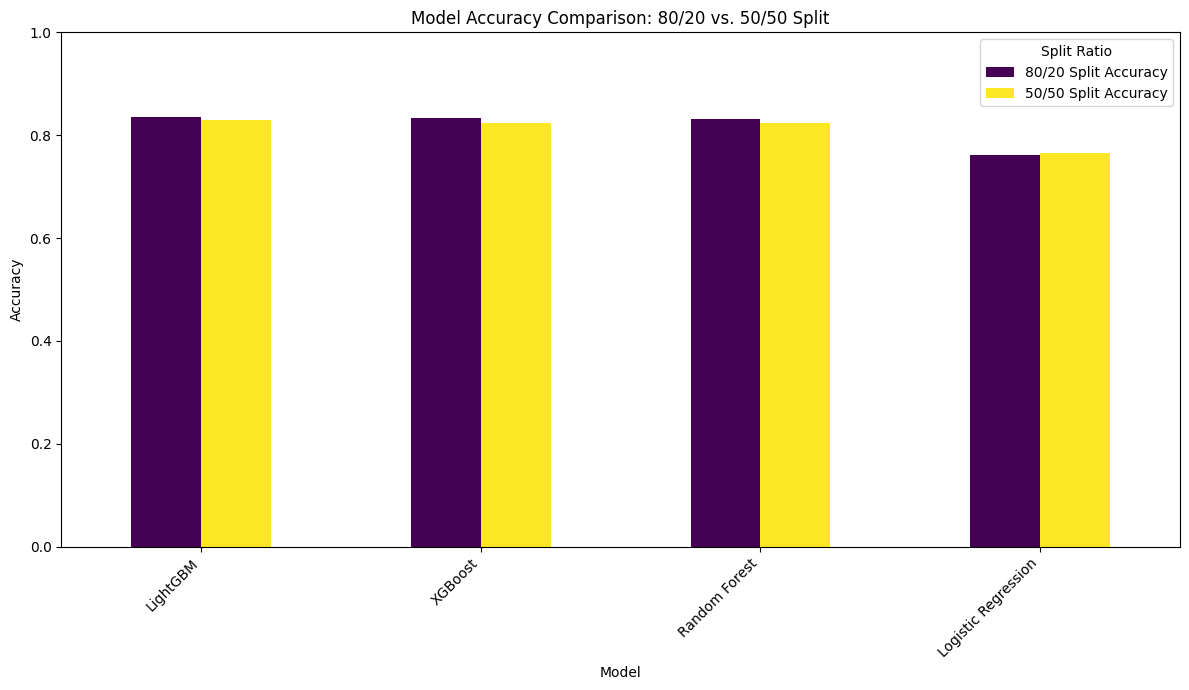

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Accuracies from 80/20 Split ---
accuracy_scores_80_20 = {
    'Logistic Regression': accuracy,
    'Random Forest': accuracy_rf,
    'LightGBM': accuracy_lgbm,
    'XGBoost': accuracy_xgb
}
accuracy_series_80_20 = pd.Series(accuracy_scores_80_20, name='80/20 Split Accuracy').sort_values(ascending=False)

# --- Accuracies from 50/50 Split ---
accuracy_scores_50_50 = {
    'Logistic Regression': accuracy_50,
    'Random Forest': accuracy_rf_50,
    'LightGBM': accuracy_lgbm_50,
    'XGBoost': accuracy_xgb_50
}
accuracy_series_50_50 = pd.Series(accuracy_scores_50_50, name='50/50 Split Accuracy').sort_values(ascending=False)

# Combine for comparison
comparison_df = pd.DataFrame({
    '80/20 Split Accuracy': accuracy_series_80_20,
    '50/50 Split Accuracy': accuracy_series_50_50
}).sort_values(by='80/20 Split Accuracy', ascending=False)

print("\n--- Model Accuracy Comparison ---")
display(comparison_df)

# Plotting the comparison
fig, ax = plt.subplots(figsize=(12, 7))
comparison_df.plot(kind='bar', ax=ax, colormap='viridis')
plt.title('Model Accuracy Comparison: 80/20 vs. 50/50 Split')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for accuracy
plt.xticks(rotation=45, ha='right')
plt.legend(title='Split Ratio')
plt.tight_layout()
plt.show()

### Why Compare Different Train-Test Splits?

Comparing model performance across different train-test splits (like 80/20 and 50/50) is important for several reasons:

**Robustness**: It helps check if the model's performance is consistent across different data splits, indicating robustness.

**Bias-Variance Trade-off**:

More training data (e.g., 80/20) reduces bias but may increase variance.

Less training data (e.g., 50/50) can increase bias but provide a more reliable test set.

**Data Availability**: For large datasets, a 50/50 split can still work well, but for smaller datasets, it may leave too little data for training.

**Overfitting/Underfitting**: A model that performs worse with less training data may be underfitting, while a sharp drop in performance with more data may indicate overfitting.

In short, testing with different splits helps better understand the model's generalization and prevents inflated or deflated performance metrics.

## K-Fold Cross-Validation

K-Fold cross-validation is a reliable method for evaluating machine learning models. Here's how it works:

**Data Partition**: The dataset is split into k equal-sized folds.

**Iterative Training and Validation:** For each fold:

One fold is used as the validation set.

The remaining k-1 folds are used for training.

The model is trained on the training set and evaluated on the validation set.

**Performance Aggregation:** After k iterations, the performance scores (like accuracy or precision) are averaged to provide a more stable estimate of the model’s generalization. The standard deviation of these scores shows performance variability.

This approach reduces both bias (by using all data for training and validation) and variance (by providing a more consistent performance estimate).

Performing 5-Fold Cross-Validation...

--- Fold 1/5 ---

--- Fold 2/5 ---

--- Fold 3/5 ---

--- Fold 4/5 ---

--- Fold 5/5 ---

--- K-Fold Cross-Validation Results ---

Logistic Regression:
  Average Accuracy: 0.7539
  Standard Deviation: 0.0108

Random Forest:
  Average Accuracy: 0.8190
  Standard Deviation: 0.0068

LightGBM:
  Average Accuracy: 0.8286
  Standard Deviation: 0.0031

XGBoost:
  Average Accuracy: 0.8273
  Standard Deviation: 0.0035

Support Vector Machine:
  Average Accuracy: 0.7838
  Standard Deviation: 0.0182

K-Nearest Neighbors:
  Average Accuracy: 0.7514
  Standard Deviation: 0.0106

Gradient Boosting Classifier:
  Average Accuracy: 0.8272
  Standard Deviation: 0.0060

Decision Tree Classifier:
  Average Accuracy: 0.7667
  Standard Deviation: 0.0084

Model Accuracy Comparison (Average over folds):
LightGBM                        0.828625
XGBoost                         0.827347
Gradient Boosting Classifier    0.827206
Random Forest                   0.818971
Suppor

/tmp/ipython-input-557165212.py:223: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracy_series.index, y=accuracy_series.values, palette='viridis')


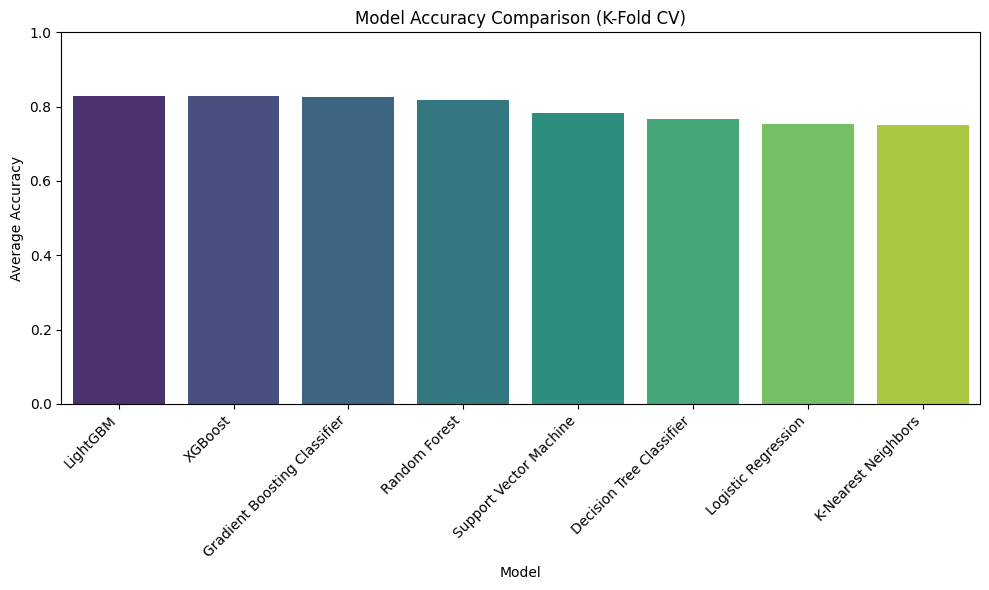

In [61]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import lightgbm as lgb
import xgboost as xgb

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------
# Encode target
# ---------------------------------
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # assumes y is your original target

# ---------------------------------
# K-Fold setup
# ---------------------------------
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)

# ---------------------------------
# Storage for each model
# ---------------------------------
logreg_accuracies, rf_accuracies, lgbm_accuracies, xgb_accuracies = [], [], [], []
svm_accuracies, knn_accuracies, gbc_accuracies, dt_accuracies = [], [], [], []

logreg_reports, rf_reports, lgbm_reports, xgb_reports = [], [], [], []
svm_reports, knn_reports, gbc_reports, dt_reports = [], [], [], []

logreg_cms, rf_cms, lgbm_cms, xgb_cms = [], [], [], []
svm_cms, knn_cms, gbc_cms, dt_cms = [], [], [], []

print(f"Performing {K}-Fold Cross-Validation...")

for fold, (train_index, val_index) in enumerate(kf.split(X_final, y_encoded)):
    print(f"\n--- Fold {fold+1}/{K} ---")
    X_train_fold, X_val_fold = X_final.iloc[train_index], X_final.iloc[val_index]
    y_train_fold, y_val_fold = y_encoded[train_index], y_encoded[val_index]

    # ---------------------------------
    # SMOTE per fold (general for any #classes)
    # ---------------------------------
    class_counts = np.bincount(y_train_fold)
    max_count = class_counts.max()
    sampling_strategy_fold = {cls: max_count for cls in range(len(class_counts))}

    smote_fold = SMOTE(sampling_strategy=sampling_strategy_fold, random_state=42)
    X_train_resampled_fold, y_train_resampled_fold = smote_fold.fit_resample(
        X_train_fold, y_train_fold
    )

    # ---------------------------------
    # Clean feature names for tree-based models
    # ---------------------------------
    X_train_resampled_fold_clean = X_train_resampled_fold.copy()
    X_val_fold_clean = X_val_fold.copy()
    X_train_resampled_fold_clean.columns = X_train_resampled_fold_clean.columns.str.replace(" ", "_")
    X_val_fold_clean.columns = X_val_fold_clean.columns.str.replace(" ", "_")

    # Detect sparse vs dense for StandardScaler
    use_sparse_scaler = hasattr(X_train_resampled_fold, "tocsr")
    scaler = StandardScaler(with_mean=False) if use_sparse_scaler else StandardScaler()

    # ---------------------------------
    # 1. Logistic Regression
    # ---------------------------------
    logreg_pipeline = Pipeline([
        ("scaler", scaler),
        ("clf", LogisticRegression(
            solver="lbfgs",
            max_iter=5000,
            tol=1e-3,
            C=1.0,
            random_state=42
        ))
    ])
    logreg_pipeline.fit(X_train_resampled_fold, y_train_resampled_fold)
    y_pred_logreg_fold = logreg_pipeline.predict(X_val_fold)

    logreg_accuracies.append(accuracy_score(y_val_fold, y_pred_logreg_fold))
    logreg_reports.append(classification_report(y_val_fold, y_pred_logreg_fold,
                                                output_dict=True, zero_division=0))
    logreg_cms.append(confusion_matrix(y_val_fold, y_pred_logreg_fold))

    # ---------------------------------
    # 2. Random Forest
    # ---------------------------------
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train_resampled_fold_clean, y_train_resampled_fold)
    y_pred_rf_fold = rf_model.predict(X_val_fold_clean)

    rf_accuracies.append(accuracy_score(y_val_fold, y_pred_rf_fold))
    rf_reports.append(classification_report(y_val_fold, y_pred_rf_fold,
                                            output_dict=True, zero_division=0))
    rf_cms.append(confusion_matrix(y_val_fold, y_pred_rf_fold))

    # ---------------------------------
    # 3. LightGBM
    # ---------------------------------
    lgbm_model = lgb.LGBMClassifier(random_state=42, verbose=-1, force_row_wise=True)
    lgbm_model.fit(X_train_resampled_fold_clean, y_train_resampled_fold)
    y_pred_lgbm_fold = lgbm_model.predict(X_val_fold_clean)

    lgbm_accuracies.append(accuracy_score(y_val_fold, y_pred_lgbm_fold))
    lgbm_reports.append(classification_report(y_val_fold, y_pred_lgbm_fold,
                                              output_dict=True, zero_division=0))
    lgbm_cms.append(confusion_matrix(y_val_fold, y_pred_lgbm_fold))

    # ---------------------------------
    # 4. XGBoost
    # ---------------------------------
    xgb_model = xgb.XGBClassifier(
        objective='multi:softmax',
        num_class=len(label_encoder.classes_),
        random_state=42,
        eval_metric='mlogloss'
    )
    xgb_model.fit(X_train_resampled_fold_clean, y_train_resampled_fold)
    y_pred_xgb_fold = xgb_model.predict(X_val_fold_clean)

    xgb_accuracies.append(accuracy_score(y_val_fold, y_pred_xgb_fold))
    xgb_reports.append(classification_report(y_val_fold, y_pred_xgb_fold,
                                             output_dict=True, zero_division=0))
    xgb_cms.append(confusion_matrix(y_val_fold, y_pred_xgb_fold))

    # ---------------------------------
    # 5. Support Vector Machine (SVM)
    # ---------------------------------
    svm_pipeline = Pipeline([
        ("scaler", scaler),
        ("clf", SVC(kernel='rbf', random_state=42))
    ])
    svm_pipeline.fit(X_train_resampled_fold, y_train_resampled_fold)
    y_pred_svm_fold = svm_pipeline.predict(X_val_fold)

    svm_accuracies.append(accuracy_score(y_val_fold, y_pred_svm_fold))
    svm_reports.append(classification_report(y_val_fold, y_pred_svm_fold,
                                             output_dict=True, zero_division=0))
    svm_cms.append(confusion_matrix(y_val_fold, y_pred_svm_fold))

    # ---------------------------------
    # 6. K-Nearest Neighbors (KNN)
    # ---------------------------------
    knn_pipeline = Pipeline([
        ("scaler", scaler),
        ("clf", KNeighborsClassifier(n_neighbors=5))
    ])
    knn_pipeline.fit(X_train_resampled_fold, y_train_resampled_fold)
    y_pred_knn_fold = knn_pipeline.predict(X_val_fold)

    knn_accuracies.append(accuracy_score(y_val_fold, y_pred_knn_fold))
    knn_reports.append(classification_report(y_val_fold, y_pred_knn_fold,
                                             output_dict=True, zero_division=0))
    knn_cms.append(confusion_matrix(y_val_fold, y_pred_knn_fold))

    # ---------------------------------
    # 7. Gradient Boosting Classifier
    # ---------------------------------
    gbc_model = GradientBoostingClassifier(random_state=42)
    gbc_model.fit(X_train_resampled_fold_clean, y_train_resampled_fold)
    y_pred_gbc_fold = gbc_model.predict(X_val_fold_clean)

    gbc_accuracies.append(accuracy_score(y_val_fold, y_pred_gbc_fold))
    gbc_reports.append(classification_report(y_val_fold, y_pred_gbc_fold,
                                             output_dict=True, zero_division=0))
    gbc_cms.append(confusion_matrix(y_val_fold, y_pred_gbc_fold))

    # ---------------------------------
    # 8. Decision Tree Classifier
    # ---------------------------------
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train_resampled_fold_clean, y_train_resampled_fold)
    y_pred_dt_fold = dt_model.predict(X_val_fold_clean)

    dt_accuracies.append(accuracy_score(y_val_fold, y_pred_dt_fold))
    dt_reports.append(classification_report(y_val_fold, y_pred_dt_fold,
                                            output_dict=True, zero_division=0))
    dt_cms.append(confusion_matrix(y_val_fold, y_pred_dt_fold))

# ---------------------------------
# Aggregate CV results
# ---------------------------------
print("\n--- K-Fold Cross-Validation Results ---")

all_model_accuracies = {
    "Logistic Regression": logreg_accuracies,
    "Random Forest": rf_accuracies,
    "LightGBM": lgbm_accuracies,
    "XGBoost": xgb_accuracies,
    "Support Vector Machine": svm_accuracies,
    "K-Nearest Neighbors": knn_accuracies,
    "Gradient Boosting Classifier": gbc_accuracies,
    "Decision Tree Classifier": dt_accuracies
}

for model_name, accuracies in all_model_accuracies.items():
    print(f"\n{model_name}:")
    print(f"  Average Accuracy: {np.mean(accuracies):.4f}")
    print(f"  Standard Deviation: {np.std(accuracies):.4f}")

# ---------------------------------
#  Compare average accuracies with a bar plot
# ---------------------------------
avg_accuracy_scores = {model: np.mean(acc) for model, acc in all_model_accuracies.items()}
accuracy_series = pd.Series(avg_accuracy_scores).sort_values(ascending=False)

print("\nModel Accuracy Comparison (Average over folds):")
print(accuracy_series)

plt.figure(figsize=(10, 6))
sns.barplot(x=accuracy_series.index, y=accuracy_series.values, palette='viridis')
plt.title('Model Accuracy Comparison (K-Fold CV)')
plt.xlabel('Model')
plt.ylabel('Average Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Hyperparameter Tuning

In [62]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import lightgbm as lgb
import xgboost as xgb

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

import numpy as np
import pandas as pd

# -------------------------------------------------
# Encode target (if not already done)
# -------------------------------------------------
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # y is your original target

# Clean feature names (good for tree models / xgboost / lightgbm)
X_clean = X_final.copy()
X_clean.columns = X_clean.columns.str.replace(" ", "_")

# -------------------------------------------------
# K-Fold for hyperparameter tuning (FASTER: 3 folds)
# -------------------------------------------------
K_TUNE = 3
cv_tune = StratifiedKFold(n_splits=K_TUNE, shuffle=True, random_state=42)

# -------------------------------------------------
# Define pipelines + *smaller* hyperparameter search spaces
# -------------------------------------------------
models_and_params = {}

# 1. Logistic Regression (space is already tiny, keep it)
logreg_pipeline = ImbPipeline([
    ("smote", SMOTE(random_state=42)),
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=5000, random_state=42))
])
logreg_param_grid = {
    "clf__C": [0.1, 1.0, 10.0],
    "clf__penalty": ["l2"],
    "clf__solver": ["lbfgs", "liblinear"]
}
models_and_params["Logistic Regression"] = (logreg_pipeline, logreg_param_grid)

# 2. Random Forest (reduced grid)
rf_pipeline = ImbPipeline([
    ("smote", SMOTE(random_state=42)),
    ("clf", RandomForestClassifier(random_state=42))
])
rf_param_grid = {
    "clf__n_estimators": [100, 300],
    "clf__max_depth": [None, 10, 20],
    "clf__min_samples_split": [2, 5],
    "clf__min_samples_leaf": [1, 2],
    "clf__max_features": ["sqrt", "log2"]
}
models_and_params["Random Forest"] = (rf_pipeline, rf_param_grid)

# 3. LightGBM (reduced but meaningful)
lgbm_pipeline = ImbPipeline([
    ("smote", SMOTE(random_state=42)),
    ("clf", lgb.LGBMClassifier(random_state=42, force_row_wise=True, verbose=-1))
])
lgbm_param_grid = {
    "clf__n_estimators": [100, 200],
    "clf__learning_rate": [0.01, 0.05, 0.1],
    "clf__num_leaves": [31, 63],
    "clf__max_depth": [-1, 10]
}
models_and_params["LightGBM"] = (lgbm_pipeline, lgbm_param_grid)

# 4. XGBoost (reduced)
xgb_pipeline = ImbPipeline([
    ("smote", SMOTE(random_state=42)),
    ("clf", xgb.XGBClassifier(
        objective="multi:softmax",
        num_class=len(np.unique(y_encoded)),
        eval_metric="mlogloss",
        random_state=42,
        # use_label_encoder=False
    ))
])
xgb_param_grid = {
    "clf__n_estimators": [100, 200],
    "clf__max_depth": [3, 6],
    "clf__learning_rate": [0.03, 0.1],
    "clf__subsample": [0.8, 1.0],
    "clf__colsample_bytree": [0.8, 1.0]
}
models_and_params["XGBoost"] = (xgb_pipeline, xgb_param_grid)

# 5. Support Vector Machine (SVM) – small but effective grid
svm_pipeline = ImbPipeline([
    ("smote", SMOTE(random_state=42)),
    ("scaler", StandardScaler()),
    ("clf", SVC(random_state=42))
])
svm_param_grid = {
    "clf__C": [0.5, 1, 5],
    "clf__gamma": ["scale", 0.01],
    "clf__kernel": ["rbf", "linear"]
}
models_and_params["Support Vector Machine"] = (svm_pipeline, svm_param_grid)

# 6. K-Nearest Neighbors (KNN)
knn_pipeline = ImbPipeline([
    ("smote", SMOTE(random_state=42)),
    ("scaler", StandardScaler()),
    ("clf", KNeighborsClassifier())
])
knn_param_grid = {
    "clf__n_neighbors": [5, 7, 11],
    "clf__weights": ["uniform", "distance"],
    "clf__p": [1, 2]
}
models_and_params["K-Nearest Neighbors"] = (knn_pipeline, knn_param_grid)

# 7. Gradient Boosting Classifier
gbc_pipeline = ImbPipeline([
    ("smote", SMOTE(random_state=42)),
    ("clf", GradientBoostingClassifier(random_state=42))
])
gbc_param_grid = {
    "clf__n_estimators": [100, 200],
    "clf__learning_rate": [0.05, 0.1],
    "clf__max_depth": [3, 5]
}
models_and_params["Gradient Boosting Classifier"] = (gbc_pipeline, gbc_param_grid)

# 8. Decision Tree
dt_pipeline = ImbPipeline([
    ("smote", SMOTE(random_state=42)),
    ("clf", DecisionTreeClassifier(random_state=42))
])
dt_param_grid = {
    "clf__max_depth": [None, 10, 20],
    "clf__min_samples_split": [2, 5],
    "clf__min_samples_leaf": [1, 2]
}
models_and_params["Decision Tree Classifier"] = (dt_pipeline, dt_param_grid)

# -------------------------------------------------
# Run RandomizedSearchCV for each model (FASTER: n_iter=8)
# -------------------------------------------------
best_models = {}
best_scores = {}
best_params_all = {}

for model_name, (pipeline, param_grid) in models_and_params.items():
    print(f"\n==============================")
    print(f"Tuning {model_name} with {K_TUNE}-Fold CV...")
    print(f"==============================")

    search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_grid,
        n_iter=8,              # fewer random combos for speed
        scoring="accuracy",
        cv=cv_tune,
        verbose=1,
        n_jobs=-1,
        random_state=42
    )

    search.fit(X_clean, y_encoded)

    best_models[model_name] = search.best_estimator_
    best_scores[model_name] = search.best_score_
    best_params_all[model_name] = search.best_params_

    print(f"\nBest CV accuracy for {model_name}: {search.best_score_:.4f}")
    print("Best hyperparameters:")
    print(search.best_params_)

# -------------------------------------------------
# Summary: best tuned CV accuracies
# -------------------------------------------------
print("\n\n=== Summary: Best Tuned CV Accuracy per Model (3-fold tuning) ===")
for model_name, score in best_scores.items():
    print(f"{model_name}: {score:.4f}")

best_scores_series = pd.Series(best_scores).sort_values(ascending=False)
print("\nSorted by accuracy (tuned):")
print(best_scores_series)



Tuning Logistic Regression with 3-Fold CV...
Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=8. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best CV accuracy for Logistic Regression: 0.7690
Best hyperparameters:
{'clf__solver': 'liblinear', 'clf__penalty': 'l2', 'clf__C': 10.0}

Tuning Random Forest with 3-Fold CV...
Fitting 3 folds for each of 8 candidates, totalling 24 fits

Best CV accuracy for Random Forest: 0.8278
Best hyperparameters:
{'clf__n_estimators': 300, 'clf__min_samples_split': 5, 'clf__min_samples_leaf': 1, 'clf__max_features': 'log2', 'clf__max_depth': 10}

Tuning LightGBM with 3-Fold CV...
Fitting 3 folds for each of 8 candidates, totalling 24 fits

Best CV accuracy for LightGBM: 0.8296
Best hyperparameters:
{'clf__num_leaves': 31, 'clf__n_estimators': 100, 'clf__max_depth': -1, 'clf__learning_rate': 0.05}

Tuning XGBoost with 3-Fold CV...
Fitting 3 folds for each of 8 candidates, totalling 24 fits

Best CV accuracy for XGBoost: 0.8319
Best hyperparameters:
{'clf__subsample': 1.0, 'clf__n_estimators': 200, 'clf__max_depth': 6, 'clf__learning_rate': 0.1, 'clf__colsample_bytree': 0.8}

Tuning Support Vector

### Comparision of Models


Tuned Model Accuracy (CV):
XGBoost                         0.831889
LightGBM                        0.829618
Gradient Boosting Classifier    0.828625
Random Forest                   0.827772
Decision Tree Classifier        0.795115
Support Vector Machine          0.788727
K-Nearest Neighbors             0.771262
Logistic Regression             0.768990
dtype: float64


/tmp/ipython-input-3004705694.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=best_scores_series.index, y=best_scores_series.values, palette='viridis')


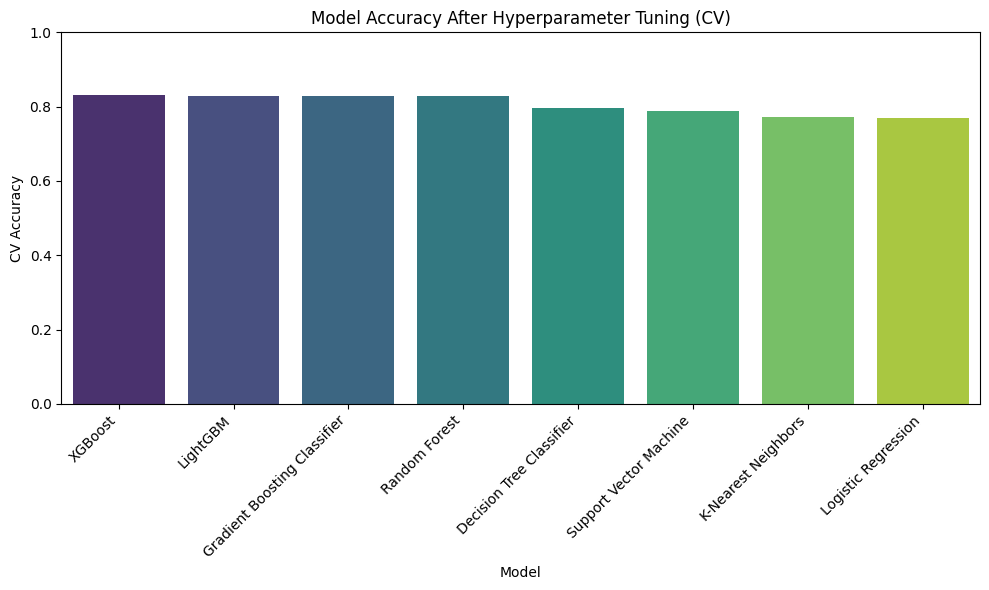

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# best_scores is the dict from your tuning step:
# best_scores = {"Logistic Regression": ..., "Random Forest": ..., ...}

# Convert to Series and sort
best_scores_series = pd.Series(best_scores).sort_values(ascending=False)

print("\nTuned Model Accuracy (CV):")
print(best_scores_series)

# Bar plot of tuned model performance
plt.figure(figsize=(10, 6))
sns.barplot(x=best_scores_series.index, y=best_scores_series.values, palette='viridis')
plt.title('Model Accuracy After Hyperparameter Tuning (CV)')
plt.xlabel('Model')
plt.ylabel('CV Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# confusion matrix, precision/recall/F1

## 1.Logistic Regression


Evaluating Tuned Logistic Regression Model with 5-Fold CV...

Classification Report - Tuned Logistic Regression:
              precision    recall  f1-score   support

     Churned       0.59      0.70      0.64      1869
      Joined       0.46      0.86      0.60       454
      Stayed       0.94      0.79      0.86      4720

    accuracy                           0.77      7043
   macro avg       0.66      0.78      0.70      7043
weighted avg       0.81      0.77      0.78      7043



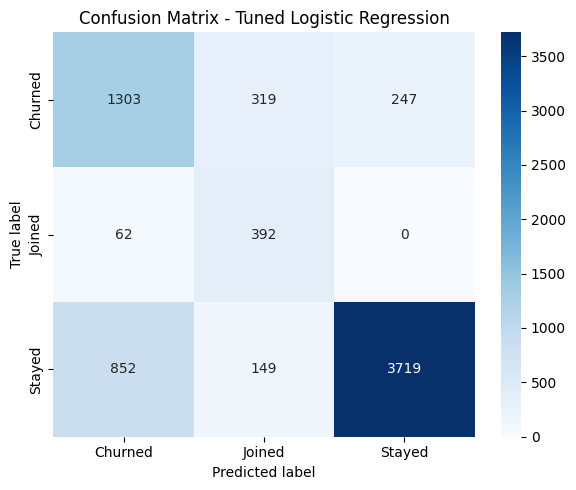

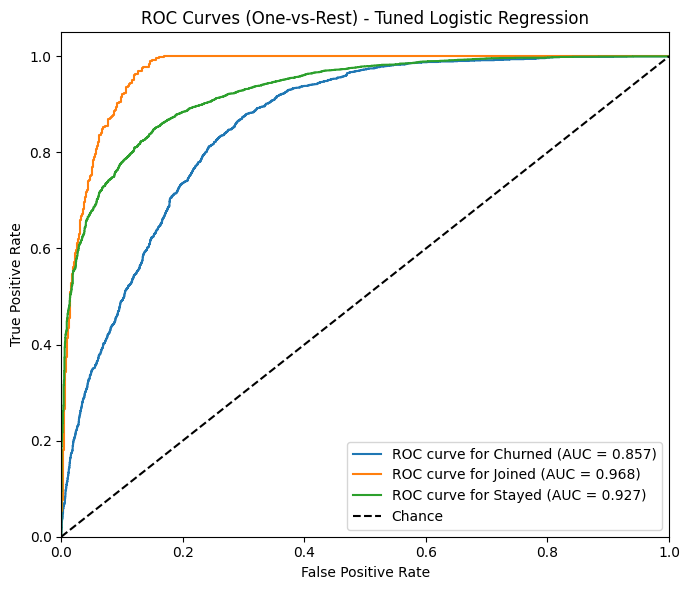


Overall ROC-AUC (OVR) for Tuned Logistic Regression: 0.9175


In [64]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    auc
)
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Retrieve the tuned Logistic Regression model
logreg_tuned_model = best_models["Logistic Regression"]

# -------------------------------------------------
# Final 5-Fold CV for detailed evaluation
# -------------------------------------------------
cv_final = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

print("\nEvaluating Tuned Logistic Regression Model with 5-Fold CV...")

# -------------------------------------------------
# Get predicted probabilities using full pipeline
# -------------------------------------------------
try:
    # X_clean already has column names replaced for tree-based models, ensure consistency
    # The scaler in the pipeline will handle the feature names automatically.
    y_proba_logreg_tuned = cross_val_predict(
        logreg_tuned_model,
        X_clean, # Use X_clean with replaced spaces in column names
        y_encoded,
        cv=cv_final,
        method="predict_proba"
    )
except Exception as e:
    print("\nLogistic Regression model does NOT support predict_proba(). Evaluation using predict() only.")
    print("Reason:", e)
    y_proba_logreg_tuned = None

# -------------------------------------------------
# Convert probabilities to class predictions or get direct predictions
# -------------------------------------------------
if y_proba_logreg_tuned is not None:
    y_pred_logreg_tuned = np.argmax(y_proba_logreg_tuned, axis=1)
else:
    y_pred_logreg_tuned = cross_val_predict(
        logreg_tuned_model,
        X_clean,
        y_encoded,
        cv=cv_final,
        method="predict"
    )

# -------------------------------------------------
# 1) CLASSIFICATION REPORT
# -------------------------------------------------
print("\nClassification Report - Tuned Logistic Regression:")
print(classification_report(y_encoded, y_pred_logreg_tuned, target_names=label_encoder.classes_))

# -------------------------------------------------
# 2) CONFUSION MATRIX PLOT
# -------------------------------------------------
cm_logreg = confusion_matrix(y_encoded, y_pred_logreg_tuned)
class_names = label_encoder.classes_

plt.figure(figsize=(6, 5))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title(f"Confusion Matrix - Tuned Logistic Regression")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()

# -------------------------------------------------
# 3) ROC CURVES (MULTICLASS) PLOT
# -------------------------------------------------
if y_proba_logreg_tuned is not None:
    n_classes = len(class_names)

    # Binarize the labels for multiclass ROC
    y_onehot = label_binarize(y_encoded, classes=range(n_classes))

    fpr = {}
    tpr = {}
    roc_auc = {}

    # Compute ROC curve and ROC area for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_onehot[:, i], y_proba_logreg_tuned[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure(figsize=(7, 6))
    for i in range(n_classes):
        plt.plot(
            fpr[i],
            tpr[i],
            label=f"ROC curve for {class_names[i]} (AUC = {roc_auc[i]:.3f})"
        )

    # Chance line
    plt.plot([0, 1], [0, 1], "k--", label="Chance")

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curves (One-vs-Rest) - Tuned Logistic Regression")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

    # Optional: overall macro ROC-AUC
    try:
        overall_roc_auc_logreg = roc_auc_score(y_encoded, y_proba_logreg_tuned, multi_class="ovr")
        print(f"\nOverall ROC-AUC (OVR) for Tuned Logistic Regression: {overall_roc_auc_logreg:.4f}")
    except Exception as e:
        print("\nOverall ROC-AUC could not be computed for Tuned Logistic Regression:", e)
else:
    print("\nROC curves skipped (model does not support predict_proba).")

## 2.Random Forest


Evaluating Tuned Random Forest Model with 5-Fold CV...

Classification Report - Tuned Random Forest:
              precision    recall  f1-score   support

     Churned       0.69      0.63      0.66      1869
      Joined       0.59      0.82      0.69       454
      Stayed       0.91      0.90      0.91      4720

    accuracy                           0.83      7043
   macro avg       0.73      0.78      0.75      7043
weighted avg       0.83      0.83      0.83      7043



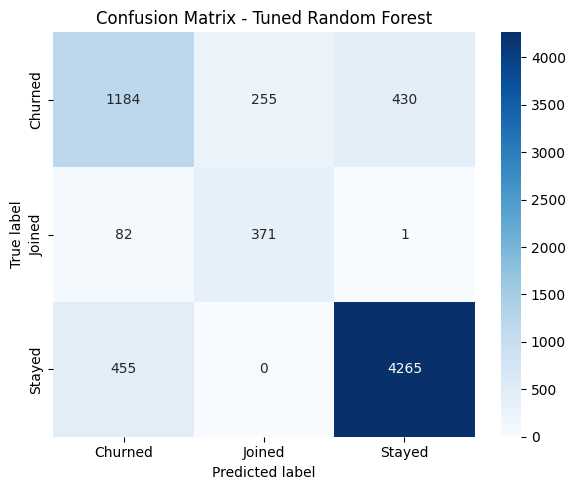

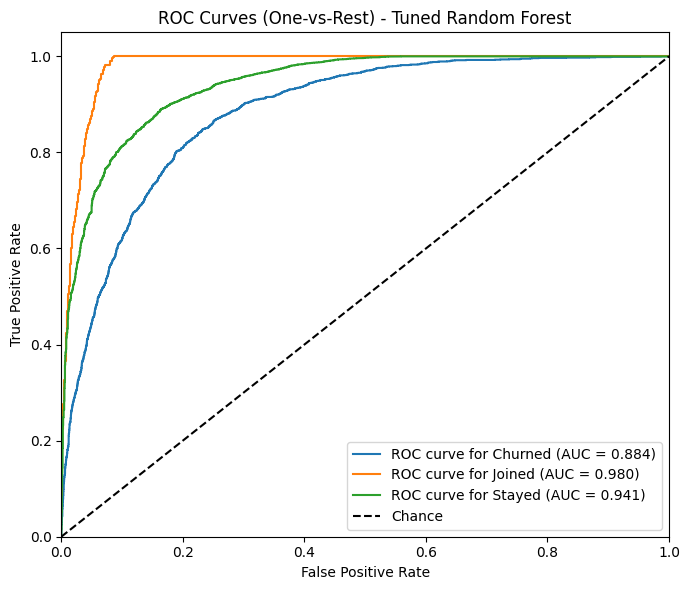


Overall ROC-AUC (OVR) for Tuned Random Forest: 0.9349


In [65]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    auc
)
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Retrieve the tuned Random Forest model
rf_tuned_model = best_models["Random Forest"]

# -------------------------------------------------
# Final 5-Fold CV for detailed evaluation
# -------------------------------------------------
cv_final = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

print("\nEvaluating Tuned Random Forest Model with 5-Fold CV...")

# -------------------------------------------------
# Get predicted probabilities using full pipeline
# -------------------------------------------------
# X_clean already has column names replaced for tree-based models.
# For pipelines with SMOTE and then a classifier, cross_val_predict will apply the full pipeline.
# Need to handle potential non-finite values in X_clean before predict_proba if the classifier doesn't handle it.
# Given that Random Forest is tree-based, it generally handles NaN values if they were passed during fitting,
# but here X_clean has no NaNs. The StandardScaler in some pipelines might require all-finite input.

# Ensure X_clean columns are consistent with the fitted pipeline (replace spaces with underscores)
# This was already done before hyperparameter tuning with X_clean = X_final.copy()
# X_clean.columns = X_clean.columns.str.replace(" ", "_")

try:
    y_proba_rf_tuned = cross_val_predict(
        rf_tuned_model,
        X_clean,
        y_encoded,
        cv=cv_final,
        method="predict_proba"
    )
except Exception as e:
    print("\nRandom Forest model does NOT support predict_proba(). Evaluation using predict() only.")
    print("Reason:", e)
    y_proba_rf_tuned = None

# -------------------------------------------------
# Convert probabilities to class predictions or get direct predictions
# -------------------------------------------------
if y_proba_rf_tuned is not None:
    y_pred_rf_tuned = np.argmax(y_proba_rf_tuned, axis=1)
else:
    y_pred_rf_tuned = cross_val_predict(
        rf_tuned_model,
        X_clean,
        y_encoded,
        cv=cv_final,
        method="predict"
    )

# -------------------------------------------------
# 1) CLASSIFICATION REPORT
# -------------------------------------------------
print("\nClassification Report - Tuned Random Forest:")
print(classification_report(y_encoded, y_pred_rf_tuned, target_names=label_encoder.classes_))

# -------------------------------------------------
# 2) CONFUSION MATRIX PLOT
# -------------------------------------------------
cm_rf = confusion_matrix(y_encoded, y_pred_rf_tuned)
class_names = label_encoder.classes_

plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title(f"Confusion Matrix - Tuned Random Forest")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()

# -------------------------------------------------
# 3) ROC CURVES (MULTICLASS) PLOT
# -------------------------------------------------
if y_proba_rf_tuned is not None:
    n_classes = len(class_names)

    # Binarize the labels for multiclass ROC
    y_onehot = label_binarize(y_encoded, classes=range(n_classes))

    fpr = {}
    tpr = {}
    roc_auc = {}

    # Compute ROC curve and ROC area for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_onehot[:, i], y_proba_rf_tuned[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure(figsize=(7, 6))
    for i in range(n_classes):
        plt.plot(
            fpr[i],
            tpr[i],
            label=f"ROC curve for {class_names[i]} (AUC = {roc_auc[i]:.3f})"
        )

    # Chance line
    plt.plot([0, 1], [0, 1], "k--", label="Chance")

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curves (One-vs-Rest) - Tuned Random Forest")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

    # Optional: overall macro ROC-AUC
    try:
        overall_roc_auc_rf = roc_auc_score(y_encoded, y_proba_rf_tuned, multi_class="ovr")
        print(f"\nOverall ROC-AUC (OVR) for Tuned Random Forest: {overall_roc_auc_rf:.4f}")
    except Exception as e:
        print("\nOverall ROC-AUC could not be computed for Tuned Random Forest:", e)
else:
    print("\nROC curves skipped (model does not support predict_proba).")

## 3.LightGBM


Evaluating Tuned LightGBM Model with 5-Fold CV...

Classification Report - Tuned LightGBM:
              precision    recall  f1-score   support

     Churned       0.70      0.63      0.66      1869
      Joined       0.62      0.72      0.67       454
      Stayed       0.90      0.92      0.91      4720

    accuracy                           0.83      7043
   macro avg       0.74      0.75      0.74      7043
weighted avg       0.83      0.83      0.83      7043



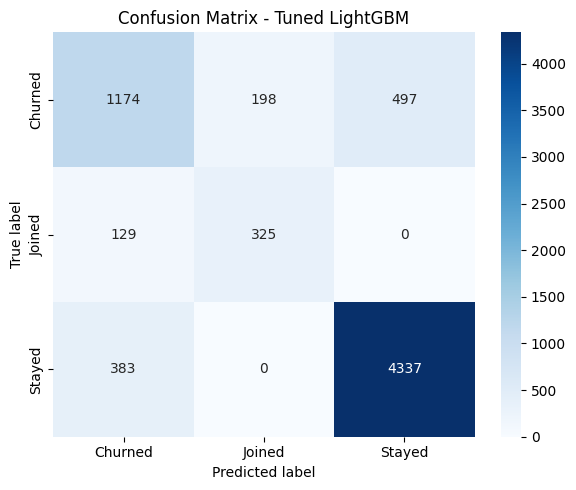

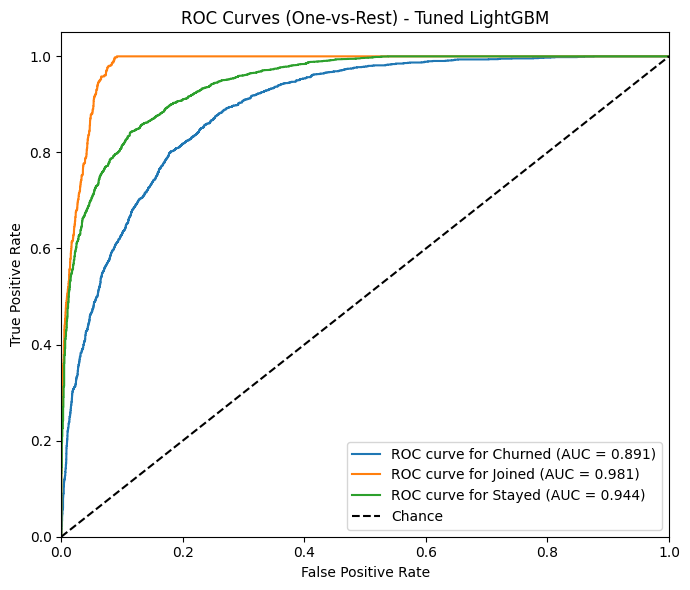


Overall ROC-AUC (OVR) for Tuned LightGBM: 0.9385


In [66]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    auc
)
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Retrieve the tuned LightGBM model
lgbm_tuned_model = best_models["LightGBM"]

# -------------------------------------------------
# Final 5-Fold CV for detailed evaluation
# -------------------------------------------------
cv_final = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

print("\nEvaluating Tuned LightGBM Model with 5-Fold CV...")

# -------------------------------------------------
# Get predicted probabilities using full pipeline
# -------------------------------------------------
try:
    # X_clean already has column names replaced for tree-based models.
    # For pipelines with SMOTE and then a classifier, cross_val_predict will apply the full pipeline.
    y_proba_lgbm_tuned = cross_val_predict(
        lgbm_tuned_model,
        X_clean,
        y_encoded,
        cv=cv_final,
        method="predict_proba"
    )
except Exception as e:
    print("\nLightGBM model does NOT support predict_proba(). Evaluation using predict() only.")
    print("Reason:", e)
    y_proba_lgbm_tuned = None

# -------------------------------------------------
# Convert probabilities to class predictions or get direct predictions
# -------------------------------------------------
if y_proba_lgbm_tuned is not None:
    y_pred_lgbm_tuned = np.argmax(y_proba_lgbm_tuned, axis=1)
else:
    y_pred_lgbm_tuned = cross_val_predict(
        lgbm_tuned_model,
        X_clean,
        y_encoded,
        cv=cv_final,
        method="predict"
    )

# -------------------------------------------------
# 1) CLASSIFICATION REPORT
# -------------------------------------------------
print("\nClassification Report - Tuned LightGBM:")
print(classification_report(y_encoded, y_pred_lgbm_tuned, target_names=label_encoder.classes_))

# -------------------------------------------------
# 2) CONFUSION MATRIX PLOT
# -------------------------------------------------
cm_lgbm = confusion_matrix(y_encoded, y_pred_lgbm_tuned)
class_names = label_encoder.classes_

plt.figure(figsize=(6, 5))
sns.heatmap(cm_lgbm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title(f"Confusion Matrix - Tuned LightGBM")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()

# -------------------------------------------------
# 3) ROC CURVES (MULTICLASS) PLOT
# -------------------------------------------------
if y_proba_lgbm_tuned is not None:
    n_classes = len(class_names)

    # Binarize the labels for multiclass ROC
    y_onehot = label_binarize(y_encoded, classes=range(n_classes))

    fpr = {}
    tpr = {}
    roc_auc = {}

    # Compute ROC curve and ROC area for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_onehot[:, i], y_proba_lgbm_tuned[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure(figsize=(7, 6))
    for i in range(n_classes):
        plt.plot(
            fpr[i],
            tpr[i],
            label=f"ROC curve for {class_names[i]} (AUC = {roc_auc[i]:.3f})"
        )

    # Chance line
    plt.plot([0, 1], [0, 1], "k--", label="Chance")

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curves (One-vs-Rest) - Tuned LightGBM")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

    # Optional: overall macro ROC-AUC
    try:
        overall_roc_auc_lgbm = roc_auc_score(y_encoded, y_proba_lgbm_tuned, multi_class="ovr")
        print(f"\nOverall ROC-AUC (OVR) for Tuned LightGBM: {overall_roc_auc_lgbm:.4f}")
    except Exception as e:
        print("\nOverall ROC-AUC could not be computed for Tuned LightGBM:", e)
else:
    print("\nROC curves skipped (model does not support predict_proba).")


## 4.Gradient Boosting Classifier


Evaluating Tuned Gradient Boosting Classifier Model with 5-Fold CV...

Classification Report - Tuned Gradient Boosting Classifier:
              precision    recall  f1-score   support

     Churned       0.69      0.63      0.66      1869
      Joined       0.61      0.76      0.68       454
      Stayed       0.90      0.91      0.91      4720

    accuracy                           0.83      7043
   macro avg       0.73      0.77      0.75      7043
weighted avg       0.83      0.83      0.83      7043



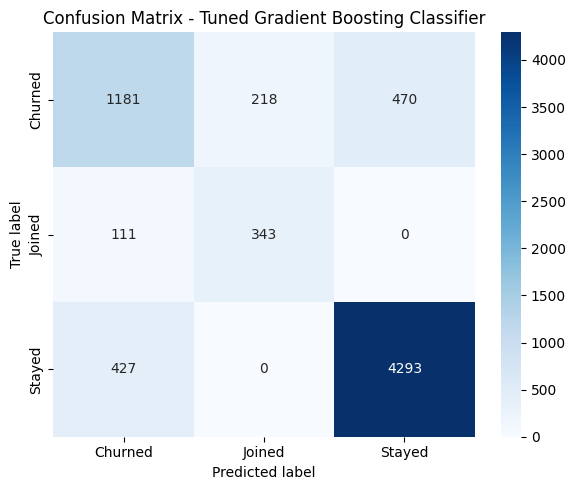

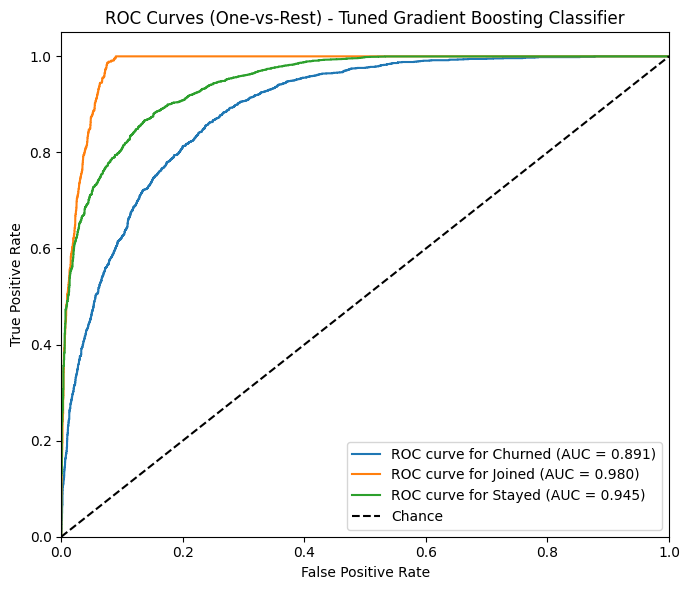


Overall ROC-AUC (OVR) for Tuned Gradient Boosting Classifier: 0.9387


In [67]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    auc
)
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Retrieve the tuned Gradient Boosting Classifier model
gbc_tuned_model = best_models["Gradient Boosting Classifier"]

# -------------------------------------------------
# Final 5-Fold CV for detailed evaluation
# -------------------------------------------------
cv_final = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

print("\nEvaluating Tuned Gradient Boosting Classifier Model with 5-Fold CV...")

# -------------------------------------------------
# Get predicted probabilities using full pipeline
# -------------------------------------------------
try:
    # The GBC pipeline includes SMOTE and GBC. X_clean should be appropriate.
    y_proba_gbc_tuned = cross_val_predict(
        gbc_tuned_model,
        X_clean,
        y_encoded,
        cv=cv_final,
        method="predict_proba"
    )
except Exception as e:
    print("\nGradient Boosting Classifier model does NOT support predict_proba(). Evaluation using predict() only.")
    print("Reason:", e)
    y_proba_gbc_tuned = None

# -------------------------------------------------
# Convert probabilities to class predictions or get direct predictions
# -------------------------------------------------
if y_proba_gbc_tuned is not None:
    y_pred_gbc_tuned = np.argmax(y_proba_gbc_tuned, axis=1)
else:
    y_pred_gbc_tuned = cross_val_predict(
        gbc_tuned_model,
        X_clean,
        y_encoded,
        cv=cv_final,
        method="predict"
    )

# -------------------------------------------------
# 1) CLASSIFICATION REPORT
# -------------------------------------------------
print("\nClassification Report - Tuned Gradient Boosting Classifier:")
print(classification_report(y_encoded, y_pred_gbc_tuned, target_names=label_encoder.classes_))

# -------------------------------------------------
# 2) CONFUSION MATRIX PLOT
# -------------------------------------------------
cm_gbc = confusion_matrix(y_encoded, y_pred_gbc_tuned)
class_names = label_encoder.classes_

plt.figure(figsize=(6, 5))
sns.heatmap(cm_gbc, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title(f"Confusion Matrix - Tuned Gradient Boosting Classifier")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()

# -------------------------------------------------
# 3) ROC CURVES (MULTICLASS) PLOT
# -------------------------------------------------
if y_proba_gbc_tuned is not None:
    n_classes = len(class_names)

    # Binarize the labels for multiclass ROC
    y_onehot = label_binarize(y_encoded, classes=range(n_classes))

    fpr = {}
    tpr = {}
    roc_auc = {}

    # Compute ROC curve and ROC area for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_onehot[:, i], y_proba_gbc_tuned[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure(figsize=(7, 6))
    for i in range(n_classes):
        plt.plot(
            fpr[i],
            tpr[i],
            label=f"ROC curve for {class_names[i]} (AUC = {roc_auc[i]:.3f})"
        )

    # Chance line
    plt.plot([0, 1], [0, 1], "k--", label="Chance")

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curves (One-vs-Rest) - Tuned Gradient Boosting Classifier")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

    # Optional: overall macro ROC-AUC
    try:
        overall_roc_auc_gbc = roc_auc_score(y_encoded, y_proba_gbc_tuned, multi_class="ovr")
        print(f"\nOverall ROC-AUC (OVR) for Tuned Gradient Boosting Classifier: {overall_roc_auc_gbc:.4f}")
    except Exception as e:
        print("\nOverall ROC-AUC could not be computed for Tuned Gradient Boosting Classifier:", e)
else:
    print("\nROC curves skipped (model does not support predict_proba).")

## 5.Decision Tree Classifier


Evaluating Tuned Decision Tree Classifier Model with 5-Fold CV...

Classification Report - Tuned Decision Tree Classifier:
              precision    recall  f1-score   support

     Churned       0.64      0.62      0.63      1869
      Joined       0.59      0.69      0.63       454
      Stayed       0.90      0.89      0.89      4720

    accuracy                           0.81      7043
   macro avg       0.71      0.73      0.72      7043
weighted avg       0.81      0.81      0.81      7043



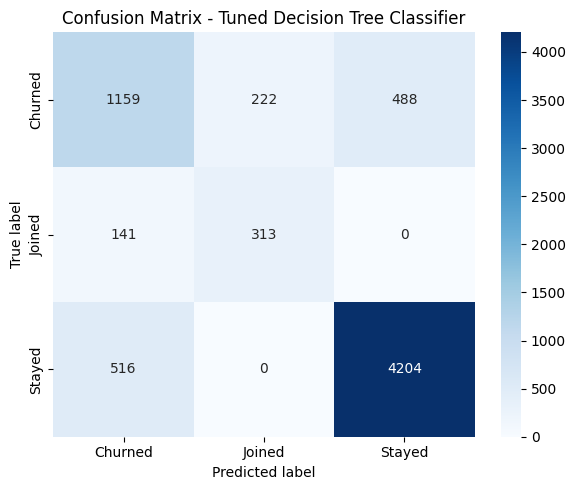

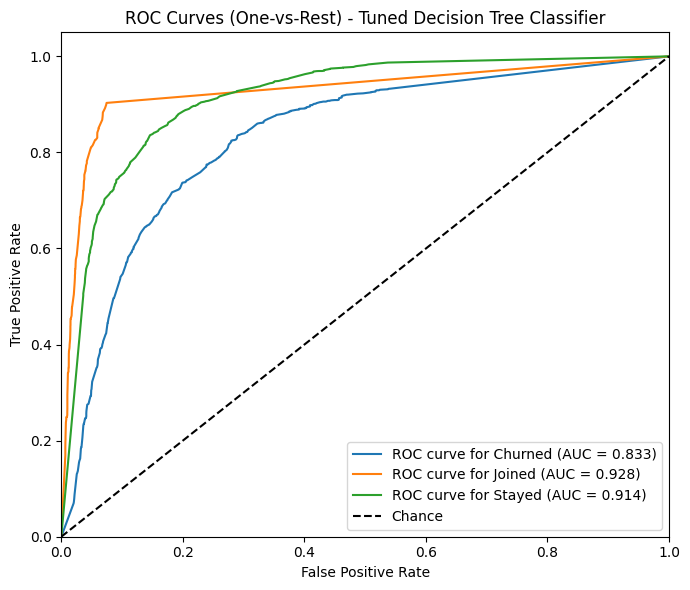


Overall ROC-AUC (OVR) for Tuned Decision Tree Classifier: 0.8915


In [68]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    auc
)
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Retrieve the tuned Decision Tree Classifier model
dt_tuned_model = best_models["Decision Tree Classifier"]

# -------------------------------------------------
# Final 5-Fold CV for detailed evaluation
# -------------------------------------------------
cv_final = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

print("\nEvaluating Tuned Decision Tree Classifier Model with 5-Fold CV...")

# -------------------------------------------------
# Get predicted probabilities using full pipeline
# -------------------------------------------------
try:
    # The DT pipeline includes SMOTE and DT. X_clean should be appropriate.
    y_proba_dt_tuned = cross_val_predict(
        dt_tuned_model,
        X_clean,
        y_encoded,
        cv=cv_final,
        method="predict_proba"
    )
except Exception as e:
    print("\nDecision Tree Classifier model does NOT support predict_proba(). Evaluation using predict() only.")
    print("Reason:", e)
    y_proba_dt_tuned = None

# -------------------------------------------------
# Convert probabilities to class predictions or get direct predictions
# -------------------------------------------------
if y_proba_dt_tuned is not None:
    y_pred_dt_tuned = np.argmax(y_proba_dt_tuned, axis=1)
else:
    y_pred_dt_tuned = cross_val_predict(
        dt_tuned_model,
        X_clean,
        y_encoded,
        cv=cv_final,
        method="predict"
    )

# -------------------------------------------------
# 1) CLASSIFICATION REPORT
# -------------------------------------------------
print("\nClassification Report - Tuned Decision Tree Classifier:")
print(classification_report(y_encoded, y_pred_dt_tuned, target_names=label_encoder.classes_))

# -------------------------------------------------
# 2) CONFUSION MATRIX PLOT
# -------------------------------------------------
cm_dt = confusion_matrix(y_encoded, y_pred_dt_tuned)
class_names = label_encoder.classes_

plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title(f"Confusion Matrix - Tuned Decision Tree Classifier")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()

# -------------------------------------------------
# 3) ROC CURVES (MULTICLASS) PLOT
# -------------------------------------------------
if y_proba_dt_tuned is not None:
    n_classes = len(class_names)

    # Binarize the labels for multiclass ROC
    y_onehot = label_binarize(y_encoded, classes=range(n_classes))

    fpr = {}
    tpr = {}
    roc_auc = {}

    # Compute ROC curve and ROC area for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_onehot[:, i], y_proba_dt_tuned[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure(figsize=(7, 6))
    for i in range(n_classes):
        plt.plot(
            fpr[i],
            tpr[i],
            label=f"ROC curve for {class_names[i]} (AUC = {roc_auc[i]:.3f})"
        )

    # Chance line
    plt.plot([0, 1], [0, 1], "k--", label="Chance")

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curves (One-vs-Rest) - Tuned Decision Tree Classifier")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

    # Optional: overall macro ROC-AUC
    try:
        overall_roc_auc_dt = roc_auc_score(y_encoded, y_proba_dt_tuned, multi_class="ovr")
        print(f"\nOverall ROC-AUC (OVR) for Tuned Decision Tree Classifier: {overall_roc_auc_dt:.4f}")
    except Exception as e:
        print("\nOverall ROC-AUC could not be computed for Tuned Decision Tree Classifier:", e)
else:
    print("\nROC curves skipped (model does not support predict_proba).")

## 6.Support Vector Machine


Evaluating Tuned Support Vector Machine Model with 5-Fold CV...

Classification Report - Tuned Support Vector Machine:
              precision    recall  f1-score   support

     Churned       0.65      0.67      0.66      1869
      Joined       0.56      0.71      0.62       454
      Stayed       0.91      0.87      0.89      4720

    accuracy                           0.81      7043
   macro avg       0.70      0.75      0.72      7043
weighted avg       0.81      0.81      0.81      7043



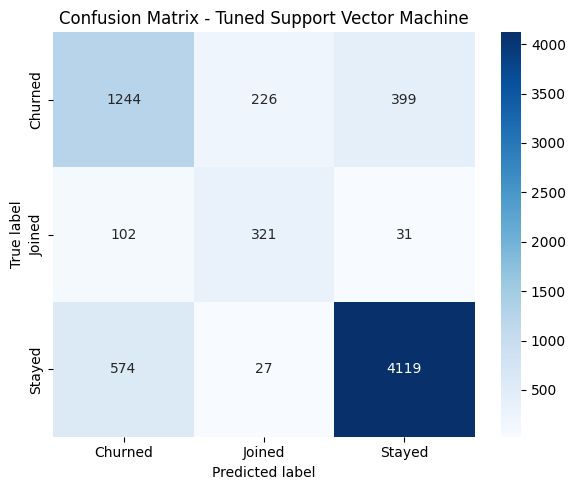

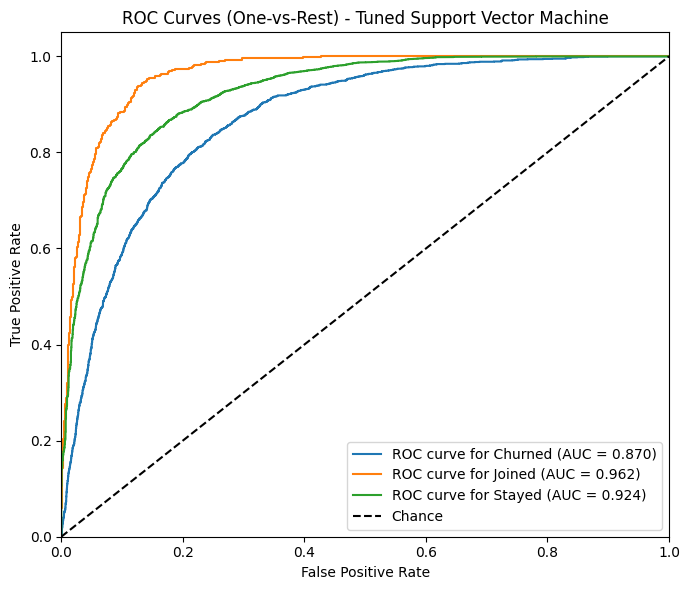


Overall ROC-AUC (OVR) for Tuned Support Vector Machine: 0.9185


In [69]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    auc
)
from sklearn.preprocessing import label_binarize
from sklearn.svm import SVC # Import SVC
from imblearn.pipeline import Pipeline as ImbPipeline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 1. Retrieve the best tuned Support Vector Machine model's parameters
best_svm_params = best_params_all["Support Vector Machine"]

# Extract the 'clf__' prefix from parameter names to apply them directly to SVC
# For example, 'clf__C' becomes 'C'
svm_clf_params = {k.replace('clf__', ''): v for k, v in best_svm_params.items()}

# 2. Recreate the SVM pipeline with `probability=True`
# The best_models["Support Vector Machine"] is an ImbPipeline, so we need to rebuild it.
# Ensure SMOTE and StandardScaler are consistent with tuning pipeline.
svm_tuned_model = ImbPipeline([
    ("smote", SMOTE(random_state=42)), # Re-add SMOTE as it was in the tuning pipeline
    ("scaler", StandardScaler()),       # Re-add StandardScaler
    ("clf", SVC(random_state=42, probability=True, **svm_clf_params)) # Use best params and set probability=True
])

# 3. Define a 5-fold stratified cross-validation strategy
cv_final = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

print("\nEvaluating Tuned Support Vector Machine Model with 5-Fold CV...")

# 4. Use cross_val_predict to get predicted probabilities
try:
    # X_clean already has column names replaced for tree-based models,
    # but StandardScaler in SVM pipeline should handle it fine.
    y_proba_svm_tuned = cross_val_predict(
        svm_tuned_model,
        X_clean,
        y_encoded,
        cv=cv_final,
        method="predict_proba",
        n_jobs=-1 # Use all available cores for faster computation
    )
except Exception as e:
    print("\nSVM model does NOT support predict_proba(). Evaluation using predict() only.")
    print("Reason:", e)
    y_proba_svm_tuned = None

# 5. Convert probabilities to class predictions or get direct predictions
if y_proba_svm_tuned is not None:
    y_pred_svm_tuned = np.argmax(y_proba_svm_tuned, axis=1)
else:
    y_pred_svm_tuned = cross_val_predict(
        svm_tuned_model,
        X_clean,
        y_encoded,
        cv=cv_final,
        method="predict",
        n_jobs=-1
    )

# 6. Print the classification report
print("\nClassification Report - Tuned Support Vector Machine:")
print(classification_report(y_encoded, y_pred_svm_tuned, target_names=label_encoder.classes_))

# 7. Generate and display the confusion matrix plot
cm_svm = confusion_matrix(y_encoded, y_pred_svm_tuned)
class_names = label_encoder.classes_

plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title(f"Confusion Matrix - Tuned Support Vector Machine")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()

# 8. Plot ROC curves (Multiclass) if probabilities are available
if y_proba_svm_tuned is not None:
    n_classes = len(class_names)

    # Binarize the labels for multiclass ROC
    y_onehot = label_binarize(y_encoded, classes=range(n_classes))

    fpr = {}
    tpr = {}
    roc_auc = {}

    # Compute ROC curve and ROC area for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_onehot[:, i], y_proba_svm_tuned[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure(figsize=(7, 6))
    for i in range(n_classes):
        plt.plot(
            fpr[i],
            tpr[i],
            label=f"ROC curve for {class_names[i]} (AUC = {roc_auc[i]:.3f})"
        )

    # Chance line
    plt.plot([0, 1], [0, 1], "k--", label="Chance")

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curves (One-vs-Rest) - Tuned Support Vector Machine")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

    # Optional: overall macro ROC-AUC
    try:
        overall_roc_auc_svm = roc_auc_score(y_encoded, y_proba_svm_tuned, multi_class="ovr")
        print(f"\nOverall ROC-AUC (OVR) for Tuned Support Vector Machine: {overall_roc_auc_svm:.4f}")
    except Exception as e:
        print("\nOverall ROC-AUC could not be computed for Tuned Support Vector Machine:", e)
else:
    print("\nROC curves skipped (model does not support predict_proba).")

## 7.K-Nearest Neighbors


Evaluating Tuned K-Nearest Neighbors Model with 5-Fold CV...

Classification Report - Tuned K-Nearest Neighbors:
              precision    recall  f1-score   support

     Churned       0.63      0.68      0.65      1869
      Joined       0.46      0.62      0.53       454
      Stayed       0.90      0.84      0.87      4720

    accuracy                           0.79      7043
   macro avg       0.66      0.72      0.69      7043
weighted avg       0.80      0.79      0.79      7043



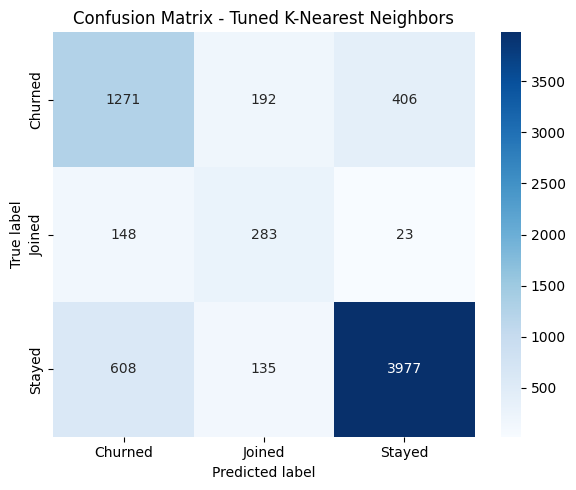

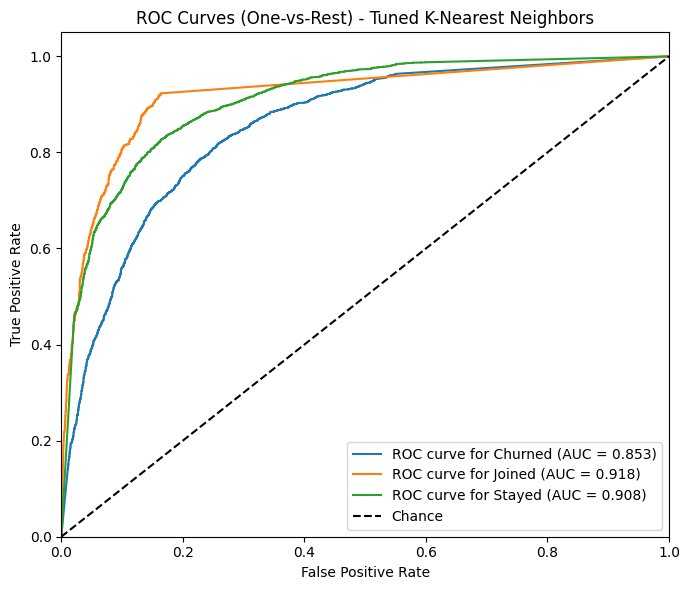


Overall ROC-AUC (OVR) for Tuned K-Nearest Neighbors: 0.8930


In [70]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    auc
)
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 1. Retrieve the best tuned K-Nearest Neighbors model
knn_tuned_model = best_models["K-Nearest Neighbors"]

# 2. Define a 5-fold stratified cross-validation strategy
cv_final = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

print("\nEvaluating Tuned K-Nearest Neighbors Model with 5-Fold CV...")

# 3. Use cross_val_predict to get predicted probabilities
try:
    # X_clean already has cleaned column names. StandardScaler in KNN pipeline handles this.
    y_proba_knn_tuned = cross_val_predict(
        knn_tuned_model,
        X_clean,
        y_encoded,
        cv=cv_final,
        method="predict_proba",
        n_jobs=-1 # Use all available cores for faster computation
    )
except Exception as e:
    print("\nKNN model does NOT support predict_proba(). Evaluation using predict() only.")
    print("Reason:", e)
    y_proba_knn_tuned = None

# 4. Convert probabilities to class predictions or get direct predictions
if y_proba_knn_tuned is not None:
    y_pred_knn_tuned = np.argmax(y_proba_knn_tuned, axis=1)
else:
    y_pred_knn_tuned = cross_val_predict(
        knn_tuned_model,
        X_clean,
        y_encoded,
        cv=cv_final,
        method="predict",
        n_jobs=-1
    )

# 5. Print the classification report
print("\nClassification Report - Tuned K-Nearest Neighbors:")
print(classification_report(y_encoded, y_pred_knn_tuned, target_names=label_encoder.classes_))

# 6. Generate and display the confusion matrix plot
cm_knn = confusion_matrix(y_encoded, y_pred_knn_tuned)
class_names = label_encoder.classes_

plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title(f"Confusion Matrix - Tuned K-Nearest Neighbors")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()

# 7. Plot ROC curves (Multiclass) if probabilities are available
if y_proba_knn_tuned is not None:
    n_classes = len(class_names)

    # Binarize the labels for multiclass ROC
    y_onehot = label_binarize(y_encoded, classes=range(n_classes))

    fpr = {}
    tpr = {}
    roc_auc = {}

    # Compute ROC curve and ROC area for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_onehot[:, i], y_proba_knn_tuned[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure(figsize=(7, 6))
    for i in range(n_classes):
        plt.plot(
            fpr[i],
            tpr[i],
            label=f"ROC curve for {class_names[i]} (AUC = {roc_auc[i]:.3f})"
        )

    # Chance line
    plt.plot([0, 1], [0, 1], "k--", label="Chance")

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curves (One-vs-Rest) - Tuned K-Nearest Neighbors")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

    # Optional: overall macro ROC-AUC
    try:
        overall_roc_auc_knn = roc_auc_score(y_encoded, y_proba_knn_tuned, multi_class="ovr")
        print(f"\nOverall ROC-AUC (OVR) for Tuned K-Nearest Neighbors: {overall_roc_auc_knn:.4f}")
    except Exception as e:
        print("\nOverall ROC-AUC could not be computed for Tuned K-Nearest Neighbors:", e)
else:
    print("\nROC curves skipped (model does not support predict_proba).")


### Best Model Name

In [71]:
best_model_name = max(best_scores, key=best_scores.get)
champion_model = best_models[best_model_name]

print("Champion model:", best_model_name)
print("CV accuracy (tuned):", best_scores[best_model_name])

Champion model: XGBoost
CV accuracy (tuned): 0.8318892483475347


### Get a detailed evaluation for the champion (confusion matrix, precision/recall/F1, etc.)

## 6.XGBoost


Evaluating Champion Model (XGBoost) with 5-Fold CV...


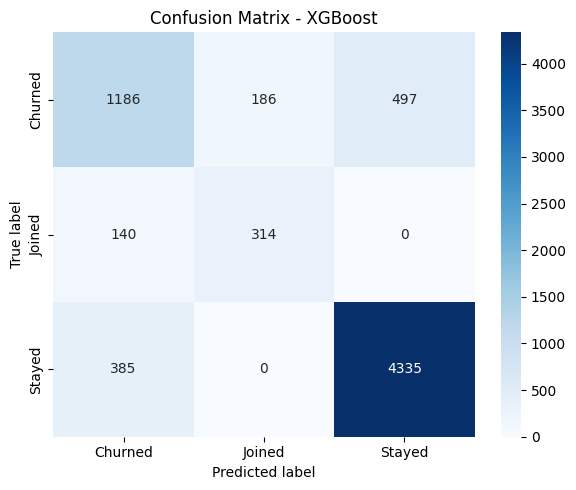

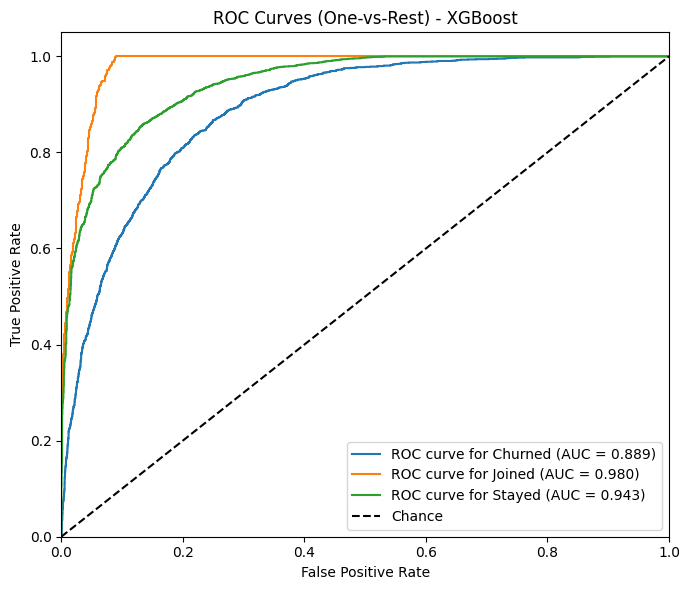


Overall ROC-AUC (OVR): 0.9370


In [72]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    auc
)
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# -------------------------------------------------
# Final 5-Fold CV for detailed champion evaluation
# -------------------------------------------------
cv_final = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

print(f"\nEvaluating Champion Model ({best_model_name}) with 5-Fold CV...")

# -------------------------------------------------
# Get predicted probabilities using full pipeline
# -------------------------------------------------
try:
    with warnings.catch_warnings():
        # Ignore the XGBoost 'use_label_encoder' warning
        warnings.filterwarnings(
            "ignore",
            category=UserWarning,
            message=".*use_label_encoder.*"
        )
        y_proba = cross_val_predict(
            champion_model,
            X_clean,
            y_encoded,
            cv=cv_final,
            method="predict_proba"
        )
except Exception as e:
    print("\nChampion model does NOT support predict_proba(). Evaluating using predict().")
    print("Reason:", e)
    y_proba = None

# -------------------------------------------------
# Convert probabilities to class predictions
# -------------------------------------------------
if y_proba is not None:
    # For multiclass softmax-style outputs → take argmax
    y_pred = np.argmax(y_proba, axis=1)
else:
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            category=UserWarning,
            message=".*use_label_encoder.*"
        )
        y_pred = cross_val_predict(
            champion_model,
            X_clean,
            y_encoded,
            cv=cv_final,
            method="predict"
        )

# -------------------------------------------------
# 1) CONFUSION MATRIX PLOT
# -------------------------------------------------
cm = confusion_matrix(y_encoded, y_pred)
class_names = label_encoder.classes_

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()

# -------------------------------------------------
# 2) ROC CURVES (MULTICLASS) PLOT
# -------------------------------------------------
if y_proba is not None:
    n_classes = len(class_names)

    # Binarize the labels for multiclass ROC
    y_onehot = label_binarize(y_encoded, classes=range(n_classes))

    fpr = {}
    tpr = {}
    roc_auc = {}

    # Compute ROC curve and ROC area for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_onehot[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure(figsize=(7, 6))
    for i in range(n_classes):
        plt.plot(
            fpr[i],
            tpr[i],
            label=f"ROC curve for {class_names[i]} (AUC = {roc_auc[i]:.3f})"
        )

    # Chance line
    plt.plot([0, 1], [0, 1], "k--", label="Chance")

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curves (One-vs-Rest) - {best_model_name}")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

    # Optional: overall macro ROC-AUC
    try:
        overall_roc_auc = roc_auc_score(y_encoded, y_proba, multi_class="ovr")
        print(f"\nOverall ROC-AUC (OVR): {overall_roc_auc:.4f}")
    except Exception as e:
        print("\nOverall ROC-AUC could not be computed:", e)
else:
    print("\nROC curves skipped (model does not support predict_proba).")


# Model Accuracy after Tuning


--- Summary of Tuned Model Accuracies (CV) ---
XGBoost                         0.831889
LightGBM                        0.829618
Gradient Boosting Classifier    0.828625
Random Forest                   0.827772
Decision Tree Classifier        0.795115
Support Vector Machine          0.788727
K-Nearest Neighbors             0.771262
Logistic Regression             0.768990
dtype: float64


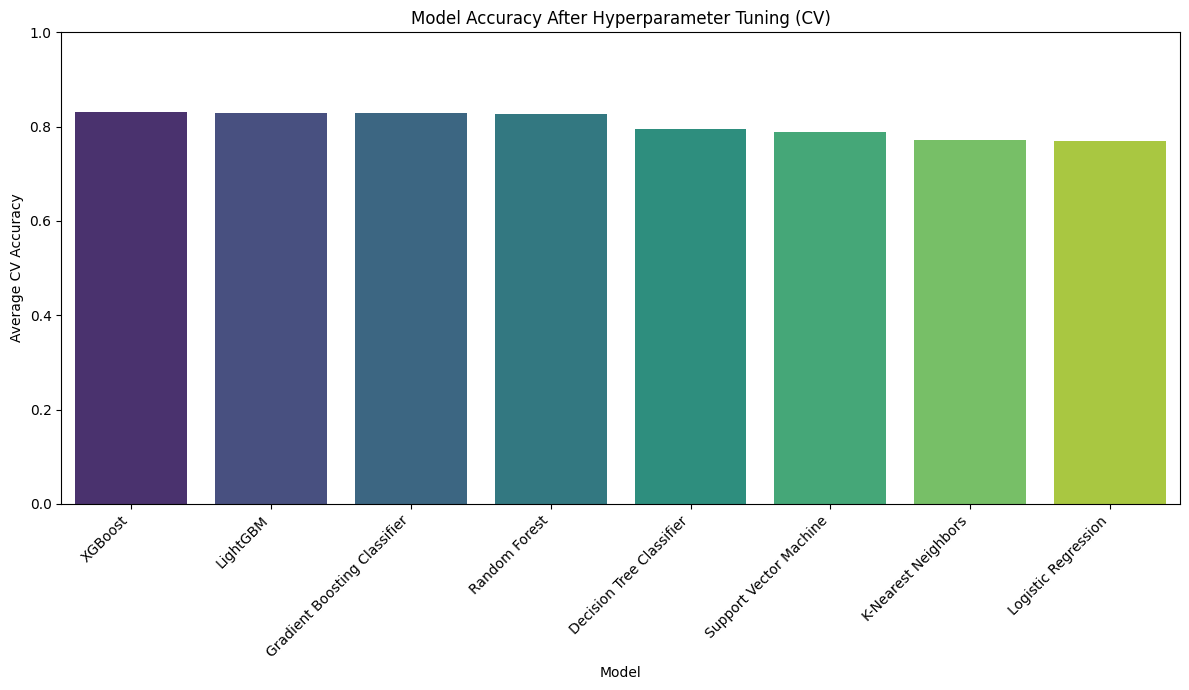

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# best_scores is the dictionary from your tuning step, which already contains all tuned models' accuracies
# best_scores = {"Logistic Regression": ..., "Random Forest": ..., ...}

# Convert to Series and sort by accuracy
best_scores_series = pd.Series(best_scores).sort_values(ascending=False)

print("\n--- Summary of Tuned Model Accuracies (CV) ---")
print(best_scores_series)

# Bar plot of tuned model performance
plt.figure(figsize=(12, 7))
sns.barplot(x=best_scores_series.index, y=best_scores_series.values, palette='viridis', hue=best_scores_series.index, legend=False)
plt.title('Model Accuracy After Hyperparameter Tuning (CV)')
plt.xlabel('Model')
plt.ylabel('Average CV Accuracy')
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for accuracy
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

### SHAP Global & Local Explanations for champion_model (XGBoost)

XGBoost Classifier expects 20 features.


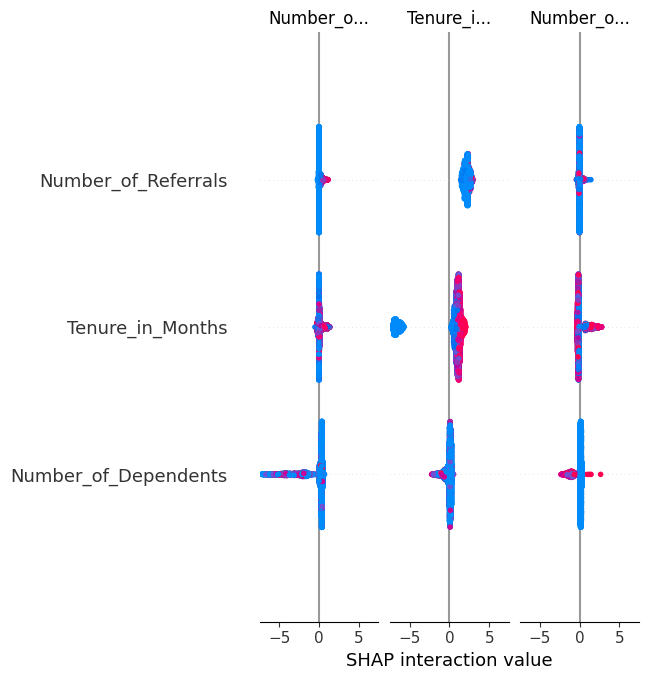

Shape of shap_values (overall): (7043, 20, 3)
Shape of shap_values for churn class: (7043, 20) (all samples, one class)
Shape of shap_values for the specific instance and churn class: (20,)
Length of features for x_row_for_plot: 20
Number of columns in X_clean: 20


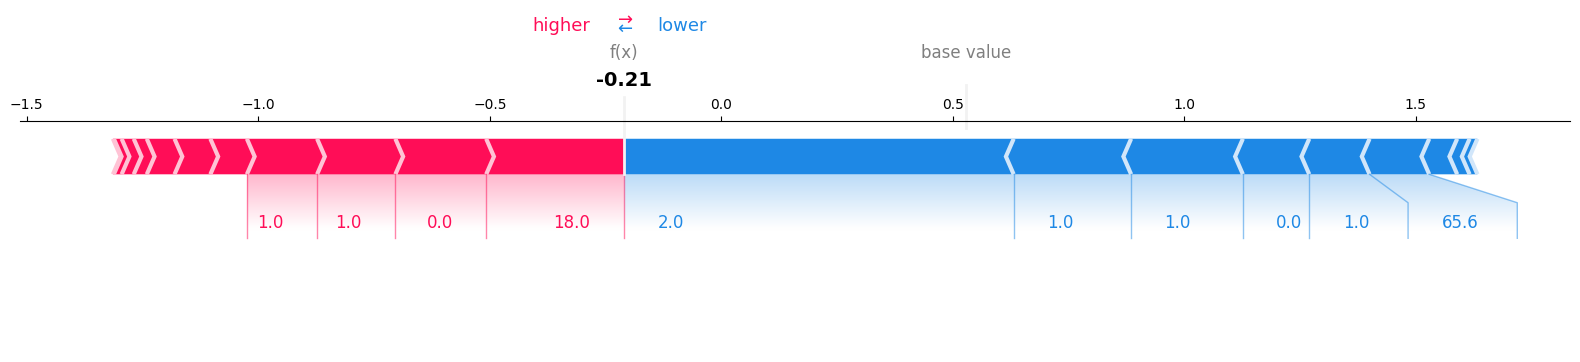

In [74]:
import shap
import numpy as np # Ensure numpy is imported

# 1. Fit champion model on the full dataset (if not already fitted)
# This was already fitted in the hyperparameter tuning cell:
# best_models[model_name] = search.best_estimator_
# champion_model = best_models[best_model_name]
# And the 'champion_model' is an ImbPipeline, e.g., for XGBoost:
# ImbPipeline([("smote", SMOTE(random_state=42)), ("clf", xgb.XGBClassifier(...))])
# This pipeline was fitted on X_clean, y_encoded.

# 2. Extract the underlying classifier from the pipeline
clf = champion_model.named_steps["clf"]

# --- Diagnostic: Check number of features the classifier expects ---
# 'n_features_in_' is an attribute that indicates the number of input features seen during fit.
print(f"XGBoost Classifier expects {getattr(clf, 'n_features_in_', 'N/A')} features.")
# ------------------------------------------------------------------

explainer = shap.TreeExplainer(clf)

# Compute SHAP values for the entire X_clean dataset.
# Convert X_clean to numpy array explicitly to avoid potential pandas DataFrame indexing issues with SHAP
shap_values = explainer.shap_values(X_clean.values)

# -----------------------------
# A) GLOBAL FEATURE IMPORTANCE
# -----------------------------
# Summary plot: which features matter most overall
shap.summary_plot(
    shap_values,
    X_clean, # Pass DataFrame here for proper labeling on the plot
    feature_names=X_clean.columns.tolist(), # Explicitly pass feature names
    show=True
)

# -----------------------------
# B) PER-FEATURE EFFECT (OPTIONAL)
# -----------------------------
# For example, how one feature affects predictions
# Replace "Some_Feature_Name" with an actual column name
# shap.dependence_plot("Some_Feature_Name", shap_values, X_clean, show=True)

# -----------------------------
# C) LOCAL EXPLANATION FOR ONE EXAMPLE
# -----------------------------
# Pick a row index you care about (for example, a churned customer)
row_idx = 0  # change this to any index you want

x_row_for_plot = X_clean.iloc[row_idx].values # Convert single instance to numpy array

# For multiclass XGBoost, shap_values is a list of arrays: one array per class
# e.g., shap_values[class_index] gives an array of shape (num_samples, num_features)
# Let's explain the "Churned" class = find its index in label_encoder.classes_
churn_class_index = list(label_encoder.classes_).index("Churned")

# --- Debugging lines before force_plot ---
print(f"Shape of shap_values (overall): {np.array(shap_values).shape if isinstance(shap_values, list) else shap_values.shape}")
print(f"Shape of shap_values for churn class: {shap_values[:,:,churn_class_index].shape} (all samples, one class)")
print(f"Shape of shap_values for the specific instance and churn class: {shap_values[row_idx, :, churn_class_index].shape}")
print(f"Length of features for x_row_for_plot: {len(x_row_for_plot)}")
print(f"Number of columns in X_clean: {X_clean.shape[1]}")
# ------------------------------------------

# Fix: Ensure x_row is passed as a 1D array/Series matching the feature dimension of SHAP values.
# Correct indexing for shap_values for a specific instance and class:
shap.force_plot(
    explainer.expected_value[churn_class_index],
    shap_values[row_idx, :, churn_class_index], # Corrected indexing
    x_row_for_plot, # Pass numpy array for a single instance
    matplotlib=True
)

### LIME

In [75]:
pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=803bfccab0a51e4e7517f728d9cab266d8505193cd6d2221d5f01de4aeb22598
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


Row index: 0
True class: Stayed
Predicted class: Stayed
Predicted probabilities: {'Churned': np.float32(0.05), 'Joined': np.float32(0.0), 'Stayed': np.float32(0.95)}

LIME explanation (feature -> contribution):
Tenure_in_Months <= 9.00: 0.2671
Contract_Two_Year <= 0.00: -0.0654
Contract_One_Year > 0.00: 0.0242
Number_of_Dependents <= 0.00: -0.0223
Internet_Type_Fiber_Optic <= 0.00: 0.0123
605.61 < Total_Revenue <= 2108.64: -0.0120
0.00 < Premium_Tech_Support_Yes <= 1.00: -0.0090
5.00 < Total_Services <= 7.00: 0.0082
Internet_Type_None <= 0.00: -0.0076
400.15 < Total_Charges <= 1394.55: -0.0066


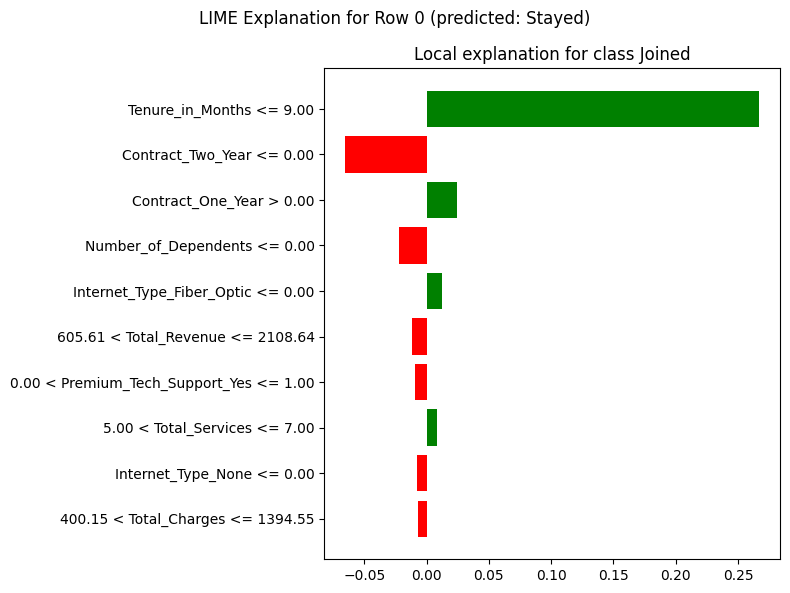

In [76]:
import numpy as np
from lime.lime_tabular import LimeTabularExplainer

# -----------------------------------------
# 1. Extract and refit the classifier ONLY
#    (no SMOTE inside, so LIME works fine)
# -----------------------------------------
clf = champion_model.named_steps["clf"]   # XGBClassifier from your pipeline
clf.fit(X_clean, y_encoded)               # fit on real data (no SMOTE)

# -----------------------------------------
# 2. Create LIME explainer
# -----------------------------------------
explainer_lime = LimeTabularExplainer(
    training_data = X_clean.values,
    feature_names = X_clean.columns.tolist(),
    class_names = label_encoder.classes_.tolist(),
    discretize_continuous = True,
    mode = "classification"
)

# -----------------------------------------
# 3. Pick one example to explain
# -----------------------------------------
row_idx = 0   # <-- change this index to any customer you want
x_row = X_clean.iloc[row_idx].values
true_class = label_encoder.classes_[y_encoded[row_idx]]
pred_proba = clf.predict_proba(X_clean.iloc[[row_idx]])[0]
pred_class_idx = np.argmax(pred_proba)
pred_class = label_encoder.classes_[pred_class_idx]

print(f"Row index: {row_idx}")
print(f"True class: {true_class}")
print(f"Predicted class: {pred_class}")
print(f"Predicted probabilities: {dict(zip(label_encoder.classes_, np.round(pred_proba, 3)))}")

# -----------------------------------------
# 4. Explain this prediction with LIME
# -----------------------------------------
exp = explainer_lime.explain_instance(
    data_row = x_row,
    predict_fn = clf.predict_proba,
    num_features = 10  # top features to show
)

# Text explanation (feature contributions)
print("\nLIME explanation (feature -> contribution):")
for feature, weight in exp.as_list():
    print(f"{feature}: {weight:.4f}")

# -----------------------------------------
# 5. Plot LIME explanation
# -----------------------------------------
# If you're in Jupyter / Colab:
%matplotlib inline
fig = exp.as_pyplot_figure()
fig.set_size_inches(8, 6)
fig.suptitle(f"LIME Explanation for Row {row_idx} (predicted: {pred_class})")
plt.tight_layout()
plt.show()


### Threshold tuning for the “Churned” class

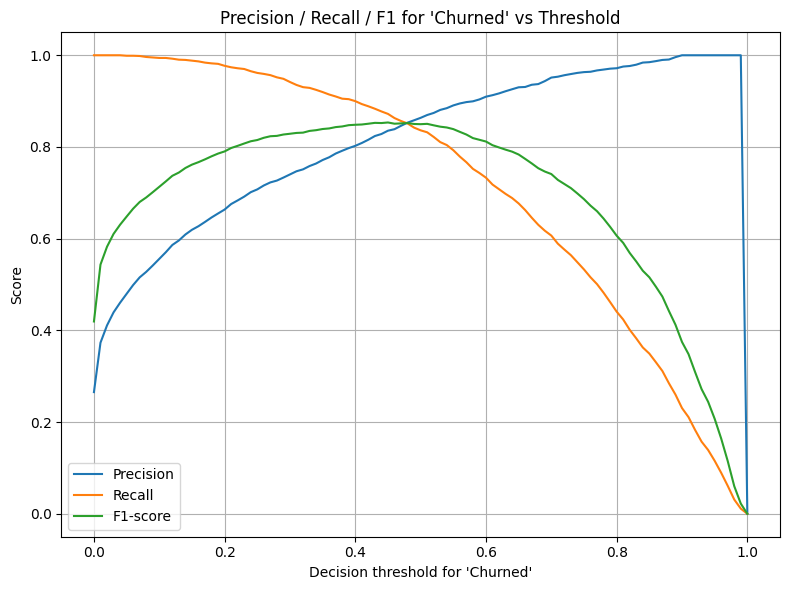

Best threshold by F1 for 'Churned': 0.45
Precision: 0.835, Recall: 0.872, F1: 0.853

Confusion matrix for 'Churned' at chosen threshold (rows=true, cols=pred):
[[4853  321]
 [ 239 1630]]


In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

# 1. Fit champion model on full data (if not already)
champion_model.fit(X_clean, y_encoded)

# 2. Get predicted probabilities for each class
y_proba_full = champion_model.predict_proba(X_clean)

# 3. Identify index of "Churned" class
churn_class_name = "Churned"
churn_idx = list(label_encoder.classes_).index(churn_class_name)

# True binary labels: 1 = Churned, 0 = Not Churned
y_true_churn = (y_encoded == churn_idx).astype(int)

# Churn probabilities
churn_scores = y_proba_full[:, churn_idx]

# 4. Sweep thresholds and compute precision/recall/F1
thresholds = np.linspace(0.0, 1.0, 101)
precisions = []
recalls = []
f1s = []

for t in thresholds:
    y_pred_churn = (churn_scores >= t).astype(int)
    p, r, f1, _ = precision_recall_fscore_support(
        y_true_churn, y_pred_churn, average="binary", zero_division=0
    )
    precisions.append(p)
    recalls.append(r)
    f1s.append(f1)

# 5. Plot precision, recall, F1 vs threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.plot(thresholds, f1s, label="F1-score")
plt.xlabel("Decision threshold for 'Churned'")
plt.ylabel("Score")
plt.title("Precision / Recall / F1 for 'Churned' vs Threshold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Example: choose threshold that maximizes F1 for Churned
best_idx = int(np.argmax(f1s))
best_threshold = thresholds[best_idx]
print(f"Best threshold by F1 for '{churn_class_name}': {best_threshold:.2f}")
print(f"Precision: {precisions[best_idx]:.3f}, Recall: {recalls[best_idx]:.3f}, F1: {f1s[best_idx]:.3f}")

# 7. Confusion matrix at this chosen threshold (binary churn vs non-churn)
y_pred_churn_best = (churn_scores >= best_threshold).astype(int)
cm_churn = confusion_matrix(y_true_churn, y_pred_churn_best)
print("\nConfusion matrix for 'Churned' at chosen threshold (rows=true, cols=pred):")
print(cm_churn)


In [78]:
import joblib
import numpy as np

# find the index of the "Churned" class
churn_class_name = "Churned"
churn_idx = list(label_encoder.classes_).index(churn_class_name)

artifacts = {
    "model": champion_model,          # the full pipeline (SMOTE is ignored at predict time)
    "label_encoder": label_encoder,
    "churn_threshold": 0.45,          # from your threshold tuning
    "churn_class_idx": churn_idx,
    "feature_names": list(X_clean.columns)
}

joblib.dump(artifacts, "churn_xgb_pipeline.pkl")
print("Saved model to churn_xgb_pipeline.pkl")


Saved model to churn_xgb_pipeline.pkl


In [79]:
from google.colab import files
files.download("churn_xgb_pipeline.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [80]:
df

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Tenure_Monthly_Charge,Referrals_Tenure,Total Services
0,Female,37,Yes,0,2,9,None,Yes,42.39,No,...,0.00,0,381.51,974.81,Stayed,No Churn,No Churn,590.40,18,6
1,Male,46,No,0,0,9,None,Yes,10.69,Yes,...,38.33,10,96.21,610.28,Stayed,No Churn,No Churn,-36.00,0,5
2,Male,50,No,0,0,4,Offer E,Yes,33.65,No,...,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices,295.60,0,4
3,Male,78,Yes,0,1,13,Offer D,Yes,27.82,No,...,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,1274.00,13,7
4,Female,75,Yes,0,3,3,None,Yes,7.38,No,...,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability,251.70,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,20,No,0,0,13,Offer D,Yes,46.68,No,...,0.00,0,606.84,1349.74,Stayed,No Churn,No Churn,716.95,0,6
7039,Male,40,Yes,0,1,22,Offer D,Yes,16.20,Yes,...,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction,1872.20,22,6
7040,Male,22,No,0,0,2,Offer E,Yes,18.62,No,...,0.00,0,37.24,129.99,Joined,No Churn,No Churn,100.60,0,4
7041,Male,21,Yes,0,5,67,Offer A,Yes,2.12,No,...,0.00,0,142.04,4769.69,Stayed,No Churn,No Churn,4545.95,335,8


### Descriptive Analysis of Churn Related Columns

In [81]:
# Value counts for 'Customer Status'
print("\nValue counts for Customer Status:")
print(df['Customer Status'].value_counts())

# Value counts for 'Churn Category'
print("\nValue counts for Churn Category:")
print(df['Churn Category'].value_counts())

# Value counts for 'Churn Reason'
print("\nValue counts for Churn Reason (top 10 reasons):")
print(df['Churn Reason'].value_counts().head(10))


Value counts for Customer Status:
Customer Status
Stayed     4720
Churned    1869
Joined      454
Name: count, dtype: int64

Value counts for Churn Category:
Churn Category
No Churn           5174
Competitor          841
Dissatisfaction     321
Attitude            314
Price               211
Other               182
Name: count, dtype: int64

Value counts for Churn Reason (top 10 reasons):
Churn Reason
No Churn                                     5174
Competitor had better devices                 313
Competitor made better offer                  311
Attitude of support person                    220
Don't know                                    130
Competitor offered more data                  117
Competitor offered higher download speeds     100
Attitude of service provider                   94
Price too high                                 78
Product dissatisfaction                        77
Name: count, dtype: int64


### Cross-tabulations for Churn Analysis

In [82]:
# Relationship between Customer Status and Churn Category
print("\nCross-tabulation: Customer Status vs. Churn Category")
display(pd.crosstab(df['Customer Status'], df['Churn Category']))

# Relationship between Customer Status and Churn Reason (top 10 reasons for churn)
# Filter for 'Churned' customers to focus on churn reasons
churned_df = df[df['Customer Status'] == 'Churned']
print("\nCross-tabulation: Churned Customer Status vs. Churn Reason (Top 10)")
display(pd.crosstab(churned_df['Customer Status'], churned_df['Churn Reason']).T.sort_values(by='Churned', ascending=False).head(10))


Cross-tabulation: Customer Status vs. Churn Category


Churn Category,Attitude,Competitor,Dissatisfaction,No Churn,Other,Price
Customer Status,,,,,,
Churned,314,841,321,0,182,211
Joined,0,0,0,454,0,0
Stayed,0,0,0,4720,0,0



Cross-tabulation: Churned Customer Status vs. Churn Reason (Top 10)


Customer Status,Churned
Churn Reason,
Competitor had better devices,313
Competitor made better offer,311
Attitude of support person,220
Don't know,130
Competitor offered more data,117
Competitor offered higher download speeds,100
Attitude of service provider,94
Price too high,78
Product dissatisfaction,77


### Visualizations for Churn Analysis

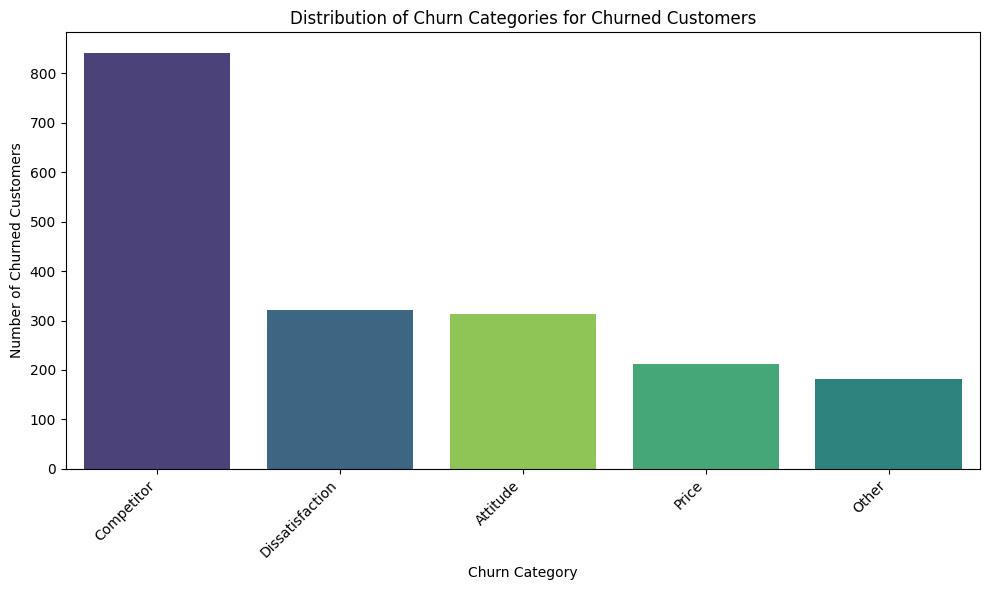

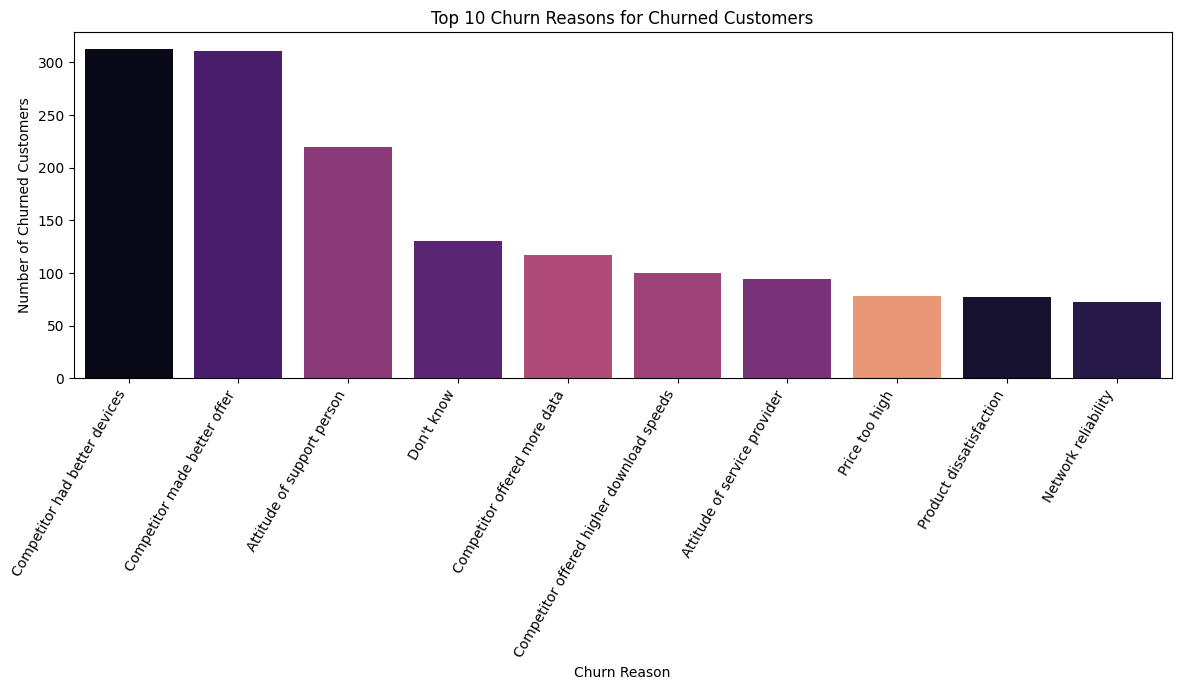

In [83]:
# Bar plot for Churn Category distribution among 'Churned' customers
plt.figure(figsize=(10, 6))
sns.countplot(x='Churn Category', data=churned_df, palette='viridis', hue='Churn Category', legend=False, order=churned_df['Churn Category'].value_counts().index)
plt.title('Distribution of Churn Categories for Churned Customers')
plt.xlabel('Churn Category')
plt.ylabel('Number of Churned Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Bar plot for top N Churn Reasons among 'Churned' customers
top_n = 10  # You can adjust this number
top_churn_reasons = churned_df['Churn Reason'].value_counts().head(top_n).index

plt.figure(figsize=(12, 7))
sns.countplot(x='Churn Reason', data=churned_df, palette='magma', hue='Churn Reason', legend=False, order=top_churn_reasons)
plt.title(f'Top {top_n} Churn Reasons for Churned Customers')
plt.xlabel('Churn Reason')
plt.ylabel('Number of Churned Customers')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

### Summary of Churn Analysis Findings and Actionable Insights

**Key Observations from Descriptive Analysis:**

Customer Status Distribution: We analyzed the proportions of customers who stayed, churned, or joined, highlighting the scale of churn and the importance of retention.

**Churn Categories:** The analysis identified common reasons for customer churn, such as competition, indicating market pressures as a key factor.

**Top Churn Reasons:** Specific churn reasons, like "Competitor had better devices" or "Price too high," pointed to areas where business intervention is needed.

**Relationship with Other Features:** We explored how customer status varied across different features:

**Contract Type:** Customers with month-to-month contracts had higher churn rates, suggesting longer contracts help with retention.

**Internet Type:** Certain internet types, like fiber optic, may have higher churn due to issues or competition.

**Services:** Lack of services like online security or tech support might contribute to churn if customers feel unsupported.

# How This Helps in the Future / Actionable Insights:

Targeted Retention Programs: Focus on high-risk customer segments, such as month-to-month contract holders, and create tailored retention strategies.

**Product/Service Improvement:** Address product dissatisfaction or service issues (e.g., network reliability, device offerings) to reduce churn.

**Competitive Strategy:** If churn is driven by competitor offers, consider reevaluating pricing, plans, or device bundles.

**Customer Service Training:** Improve support interactions if churn reasons highlight issues like poor service attitudes.

**Proactive Engagement:** Identify high-risk customers early and engage them through loyalty programs or personalized check-ins.

**Feature Engineering for Models:** Use insights from EDA to guide feature creation, improving model accuracy by focusing on key churn drivers.

# Summary:

This analysis gives a clear understanding of why customers churn, providing actionable insights to guide retention efforts, service improvements, and future modeling strategies.